### 음주 여부에 따라 건강검진 수치 차이가 있을까?
### 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import os
if os.name == 'nt' :
    plt.rc("font", family="Malgun Gothic")
else:
    plt.rc("font", family="AppleGothic")
    
plt.rc("axes", unicode_minus=False)

In [3]:
# 레티나 설정 : 글씨 선명하게
%config InlineBackend.figure_format = "retina"

In [4]:
df = pd.read_csv("data/NHIS_OPEN_GJ_2017.csv", encoding="cp949")
df.shape

(1000000, 34)

In [5]:
df.head()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  시력(좌)  \
0  2017        1     1            8    43        170         75  90.0    1.0   
1  2017        2     1            7    11        180         80  89.0    0.9   
2  2017        3     1            9    41        165         75  91.0    1.2   
3  2017        4     1           11    48        175         80  91.0    1.5   
4  2017        5     1           11    30        165         60  80.0    1.0   

   시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  치아마모증유무  \
0    1.0  ...   40.0   1.0   1.0         1      NaN    NaN      NaN   
1    1.2  ...   27.0   3.0   0.0         1      NaN    NaN      NaN   
2    1.5  ...   68.0   1.0   0.0         0      NaN    NaN      NaN   
3    1.2  ...   18.0   1.0   0.0         1      NaN    NaN      NaN   
4    1.2  ...   25.0   1.0   0.0         1      NaN    NaN      NaN   

   제3대구치(사랑니)이상   치석   데이터공개일자  
0           NaN  1.0  20181126  
1           NaN  2.0  20181126  
2           NaN  NaN  20181126  
3           NaN  0.0  20181126  
4           NaN  0.0  20181126  

[5 rows x 34 columns]

In [6]:
df.tail()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
999995  2017   999996     1           10    48        175         80  92.1   
999996  2017   999997     1            8    41        170         75  86.0   
999997  2017   999998     2            9    26        155         50  68.0   
999998  2017   999999     1            6    29        175         60  72.0   
999999  2017  1000000     1           11    41        160         70  90.5   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
999995    1.5    1.5  ...   27.0   1.0   0.0         0      NaN    NaN   
999996    1.0    1.5  ...   15.0   1.0   0.0         0      NaN    NaN   
999997    1.0    0.7  ...   17.0   3.0   1.0         0      NaN    NaN   
999998    1.5    1.0  ...   17.0   1.0   0.0         0      NaN    NaN   
999999    1.0    1.5  ...   36.0   3.0   1.0         0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상  치석   데이터공개일자  
999995      NaN           NaN NaN  20181126  
999996      NaN           NaN NaN  20181126  
999997      NaN           NaN NaN  20181126  
999998      NaN           NaN NaN  20181126  
999999      NaN           NaN NaN  20181126  

[5 rows x 34 columns]

In [7]:
df.sample()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
152851  2017   152852     1           13    11        170         75  84.5   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
152851    1.2    1.0  ...   21.0   1.0   1.0         1      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
152851      NaN           NaN  1.0  20181126  

[1 rows x 34 columns]

### 데이터 기본정보

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
기준년도            1000000 non-null int64
가입자일련번호         1000000 non-null int64
성별코드            1000000 non-null int64
연령대코드(5세단위)     1000000 non-null int64
시도코드            1000000 non-null int64
신장(5Cm단위)       1000000 non-null int64
체중(5Kg단위)       1000000 non-null int64
허리둘레            999734 non-null float64
시력(좌)           999817 non-null float64
시력(우)           999811 non-null float64
청력(좌)           999842 non-null float64
청력(우)           999844 non-null float64
수축기혈압           999981 non-null float64
이완기혈압           999982 non-null float64
식전혈당(공복혈당)      999958 non-null float64
총콜레스테롤          999957 non-null float64
트리글리세라이드        999955 non-null float64
HDL콜레스테롤        999956 non-null float64
LDL콜레스테롤        997088 non-null float64
혈색소             999948 non-null float64
요단백             995408 non-null float64
혈청크레아티닌         999957 non-null float64
(혈청지오티)AST     

In [9]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [10]:
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진수검여부          int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

### 결측치 보기

In [11]:
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               599477
데이터공개일자               0
dtype: int64

In [12]:
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               599477
데이터공개일자               0
dtype: int64

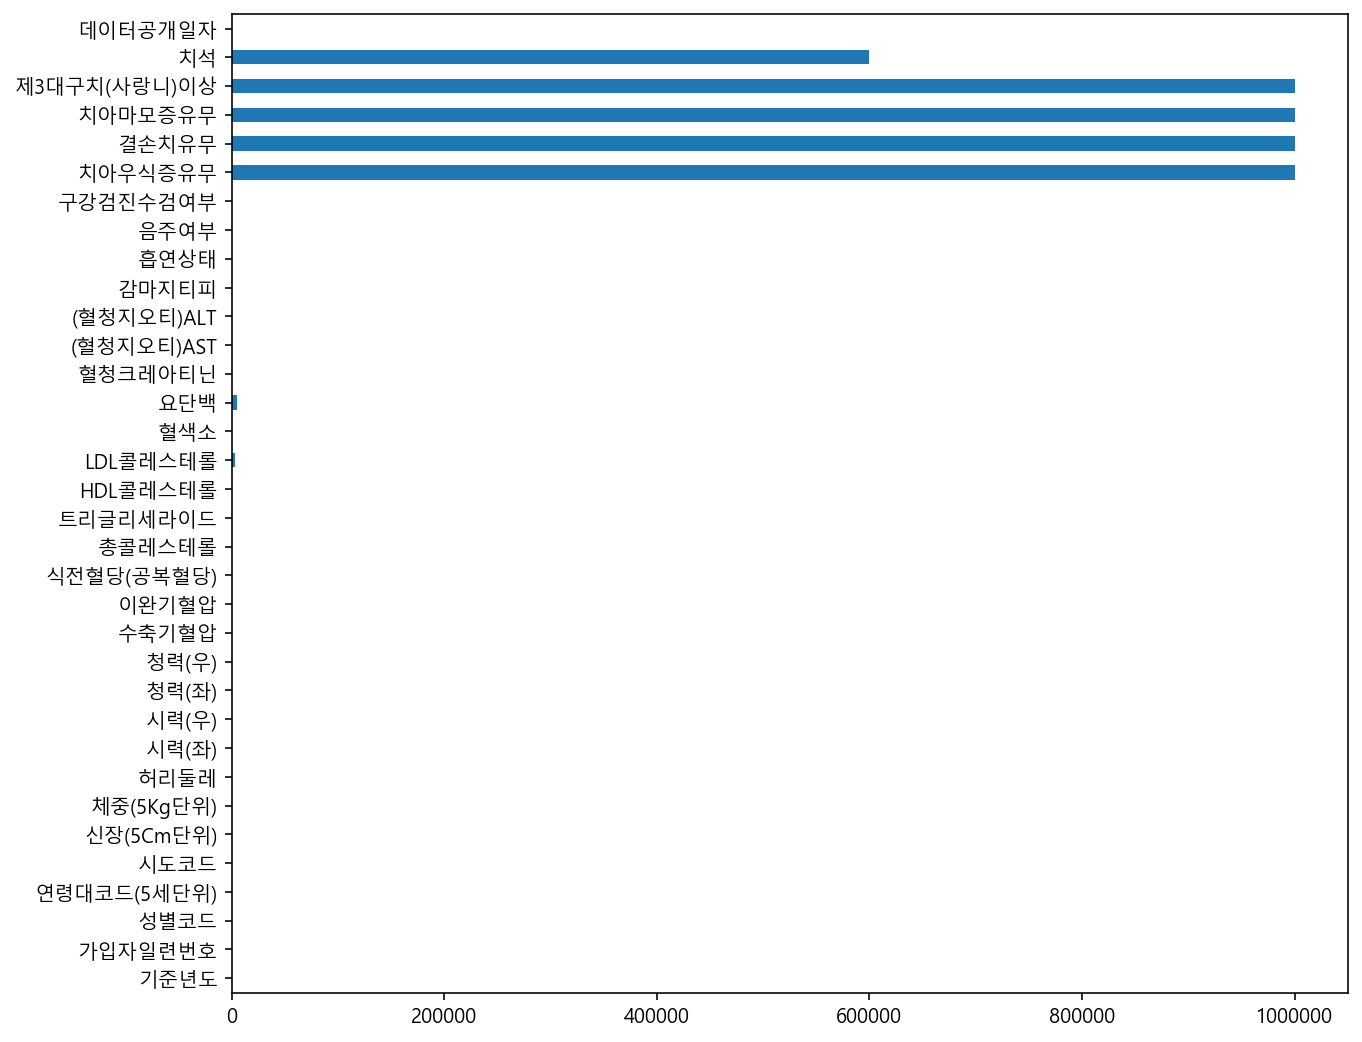

In [13]:
df.isnull().sum().plot.barh(figsize=(10,9))

### 일부 데이터 요약하기

In [14]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()

(혈청지오티)ALT  (혈청지오티)AST
0        35.0        21.0
1        36.0        20.0
2        32.0        47.0
3        34.0        29.0
4        12.0        19.0

In [15]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

(혈청지오티)ALT     (혈청지오티)AST
count  999958.000000  999959.000000
mean       25.749509      25.994671
std        26.294770      23.587469
min         1.000000       1.000000
25%        15.000000      19.000000
50%        20.000000      23.000000
75%        29.000000      28.000000
max      7210.000000    9999.000000

In [16]:
df["성별코드"].value_counts()

1    530410
2    469590
Name: 성별코드, dtype: int64

In [17]:
df["흡연상태"].value_counts()

1.0    607942
3.0    215702
2.0    176212
Name: 흡연상태, dtype: int64

### groupby와 pivot_table 사용하기

In [18]:
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [19]:
df.groupby(["성별코드","음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     0.0     173612
      1.0     356587
2     0.0     326827
      1.0     142438
Name: 가입자일련번호, dtype: int64

In [20]:
df.groupby(["성별코드","음주여부"])["감마지티피"].mean()
# 음주를 하고 있는 사람이 감마지티피가 더 높다

성별코드  음주여부
1     0.0     34.739868
      1.0     56.610981
2     0.0     22.612408
      1.0     25.001018
Name: 감마지티피, dtype: float64

In [21]:
df.groupby(["성별코드","음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     1.0   356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    0.0   326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     1.0   142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

In [22]:
# agg를 사용하면 여러 수치를 함께 구할 수 있다
df.groupby(["성별코드","음주여부"])["감마지티피"].agg(["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    0.0   173604  34.739868    25.0
     1.0   356576  56.610981    37.0
2    0.0   326813  22.612408    17.0
     1.0   142429  25.001018    17.0

In [23]:
# groupby : 기본적 값은 시리즈 / pivot_table :  값이 프레임 출력, 직관적
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")

가입자일련번호
음주여부         
0.0    500439
1.0    499025

In [24]:
df.pivot_table(index="음주여부", values="감마지티피", aggfunc="mean")

감마지티피
음주여부           
0.0   26.819650
1.0   47.588675

In [25]:
# 기본값으로 평균값을 가진다
df.pivot_table(index="음주여부", values="감마지티피", aggfunc=["mean", "median"])

mean median
          감마지티피  감마지티피
음주여부                  
0.0   26.819650   19.0
1.0   47.588675   30.0

In [26]:
df.pivot_table(index=["성별코드", "음주여부"], values="감마지티피", aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    0.0   18.0  25.0  38.0  173604.0  999.0  34.739868  1.0  37.606197
     1.0   24.0  37.0  63.0  356576.0  999.0  56.610981  1.0  68.851128
2    0.0   13.0  17.0  24.0  326813.0  999.0  22.612408  1.0  25.203579
     1.0   13.0  17.0  25.0  142429.0  999.0  25.001018  1.0  36.725100

### 전체 데이터 시각화 하기
- 100만개가 넘는 데이터를 시각화할 때는 되도록 groupby or pivot_table로 연산하고 시각화 하는 것은 권장
- seaborn과 같은 고급 통계 연산 그래프를 사용하면 많이 느릴 수 있음

#### 히스토그램

In [27]:
h = df.hist(figsize=(12,12))
# 그래프 위에 문장 없애고 싶으면, 변수로 지정

#### 슬라이싱을 사용해 히스토그램 그리기
- 슬라이싱 기능 : 데이터 나누어 그리기
- 슬라이싱 사용 시 iloc를 활용하면 인덱스 순서대로 슬라이싱 가능
- iloc[행,열] 순으로 / 전체 데이터 : [:,:]
- 대괄호 안의 콜론 앞뒤에 숫자 써주면 해당 시작 인덱스:끝나는인덱스(+1) 지정

In [28]:
h = df.iloc[:, :12].hist(figsize=(12,12))

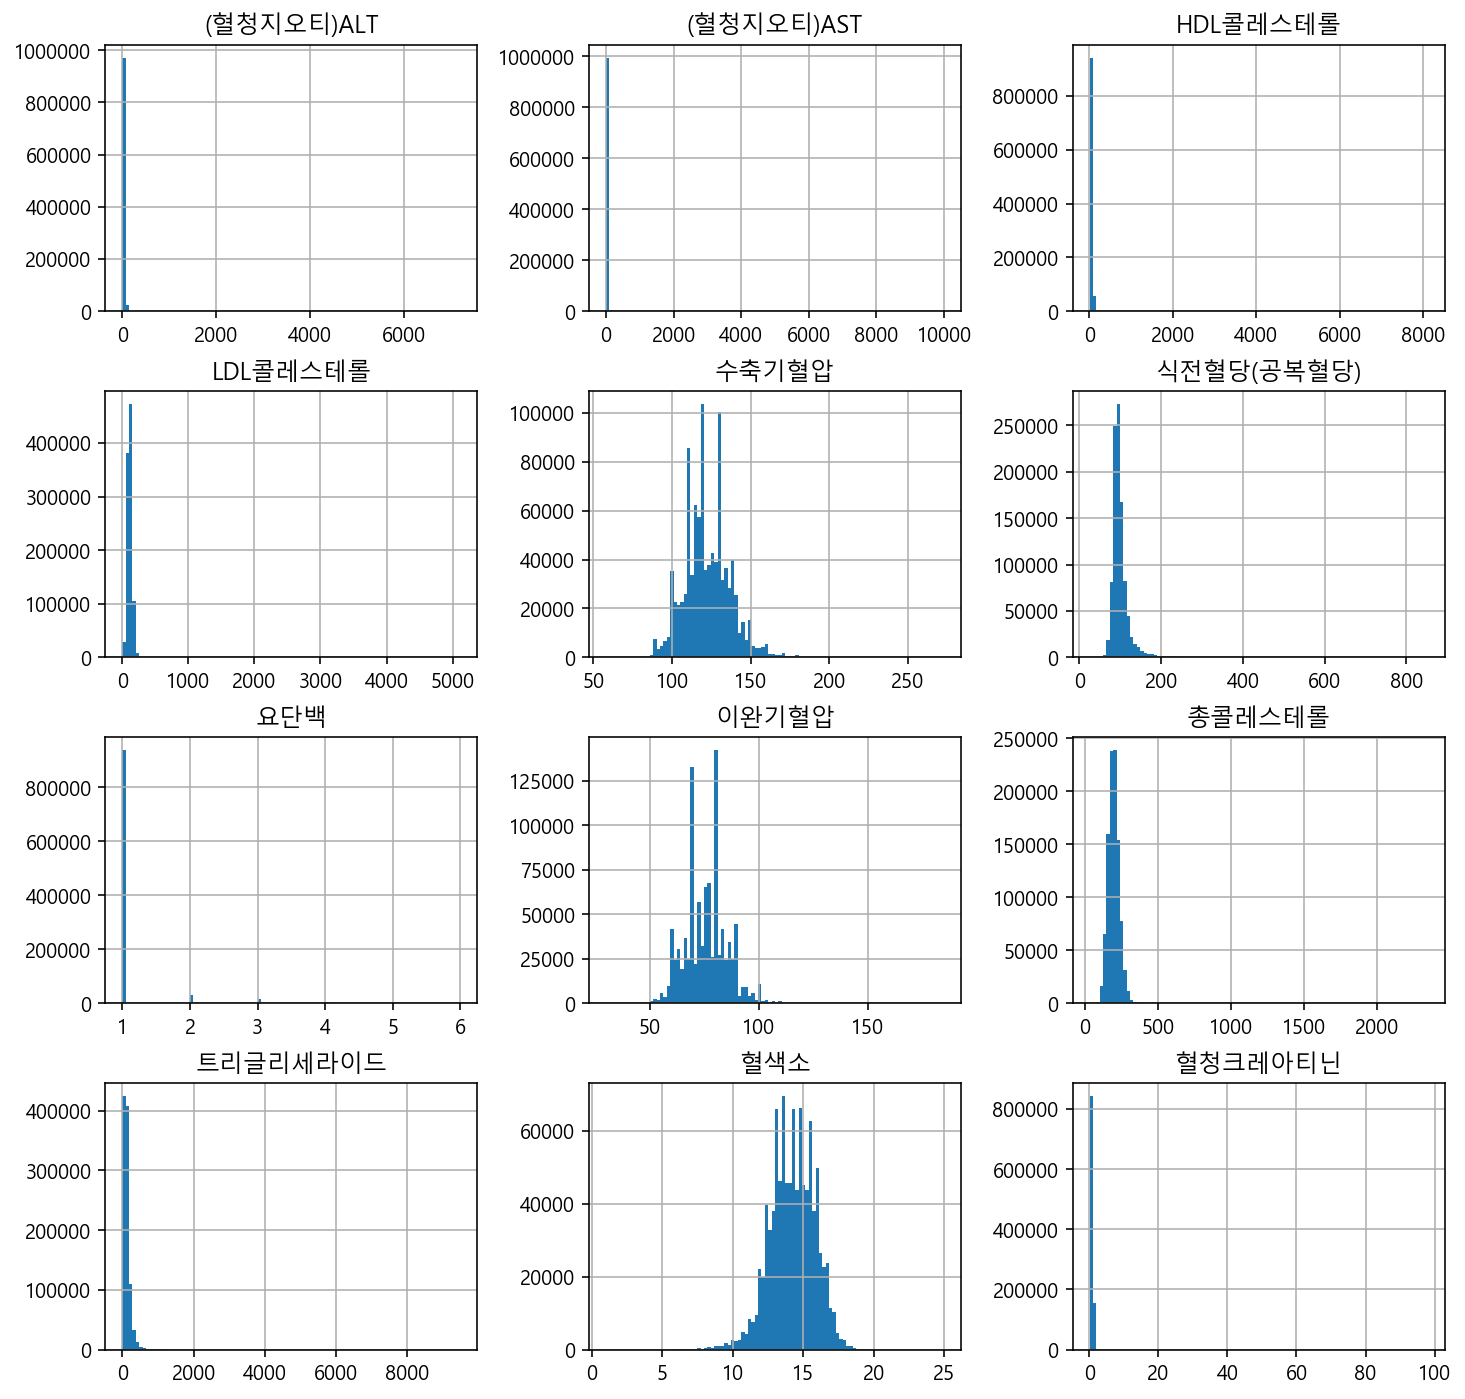

In [29]:
h = df.iloc[:,12:24].hist(figsize=(12,12), bins=100)
# bins 옵션은 막대 갯수 :  숫자 커지면 더 자세한 그래프

In [30]:
h = df.iloc[:,24:].hist(figsize=(12,12), bins=50)

### 범주형(카테고리) 데이터 시각화

In [31]:
df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 34)

#### countplot

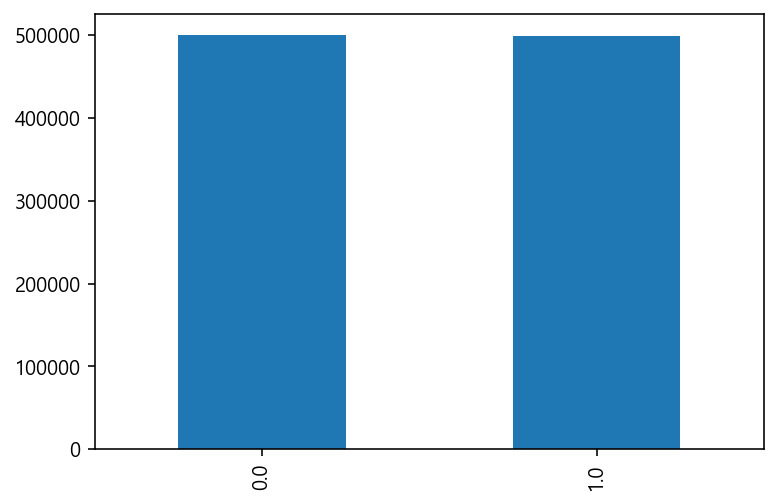

In [32]:
df["음주여부"].value_counts().plot.bar()

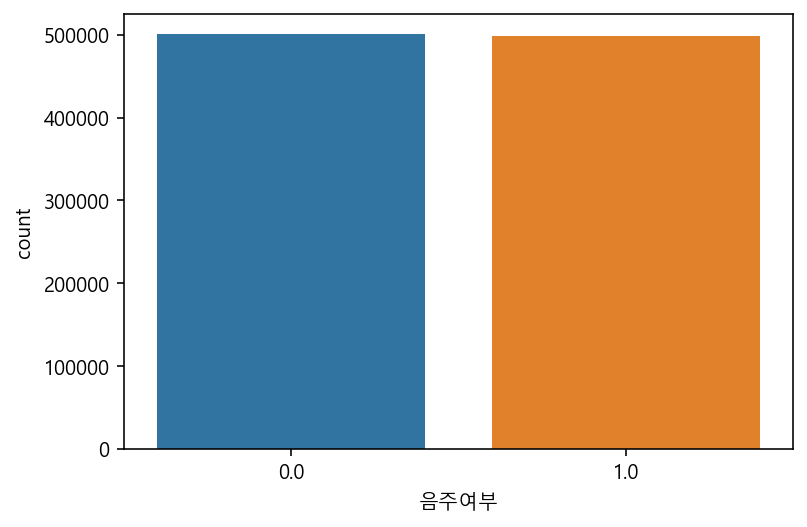

In [33]:
sns.countplot(data=df, x="음주여부")

In [34]:
sns.set(font_scale=1.0, font="Malgun Gothic")
sns.countplot(data=df, x="음주여부", hue="성별코드")

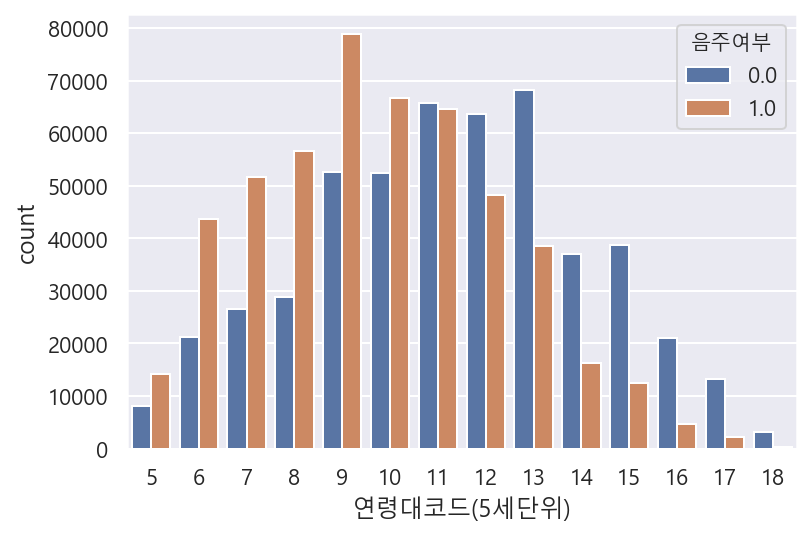

In [35]:
sns.countplot(data=df, x='연령대코드(5세단위)', hue="음주여부")

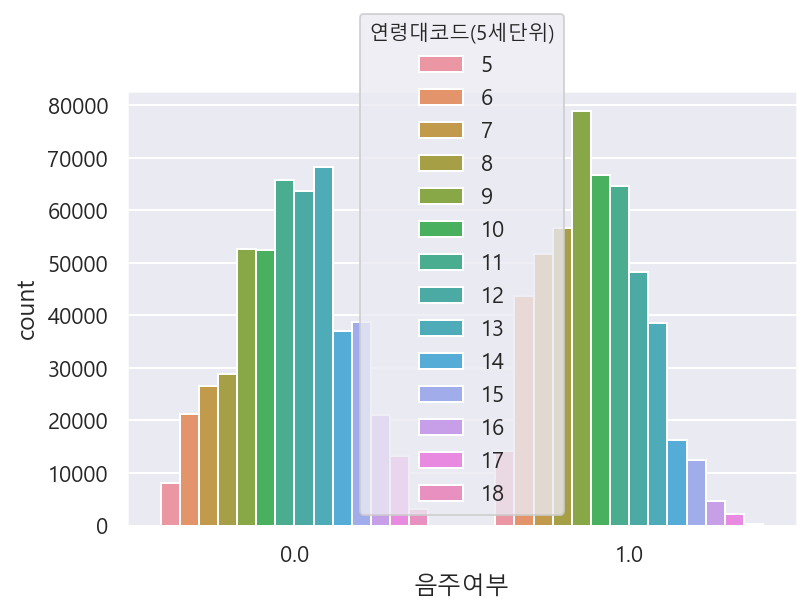

In [36]:
sns.countplot(data=df, x="음주여부", hue='연령대코드(5세단위)')

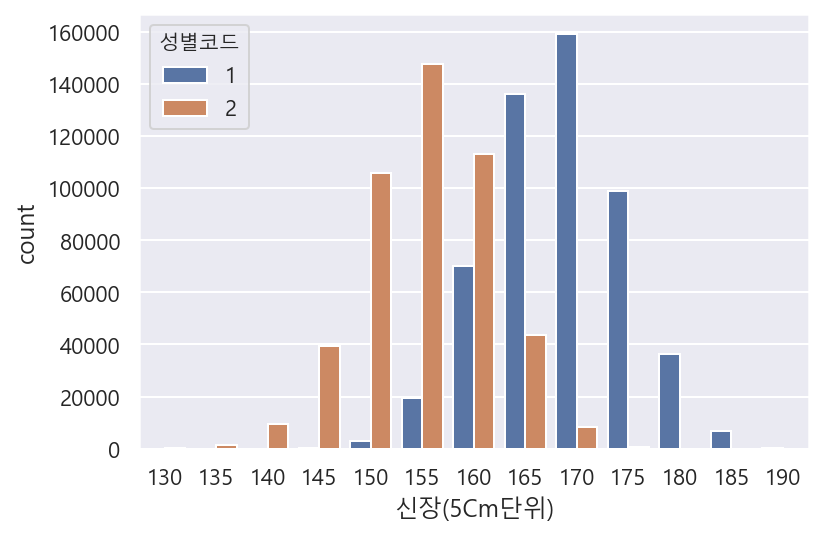

In [37]:
sns.countplot(data=df, x="신장(5Cm단위)", hue="성별코드")

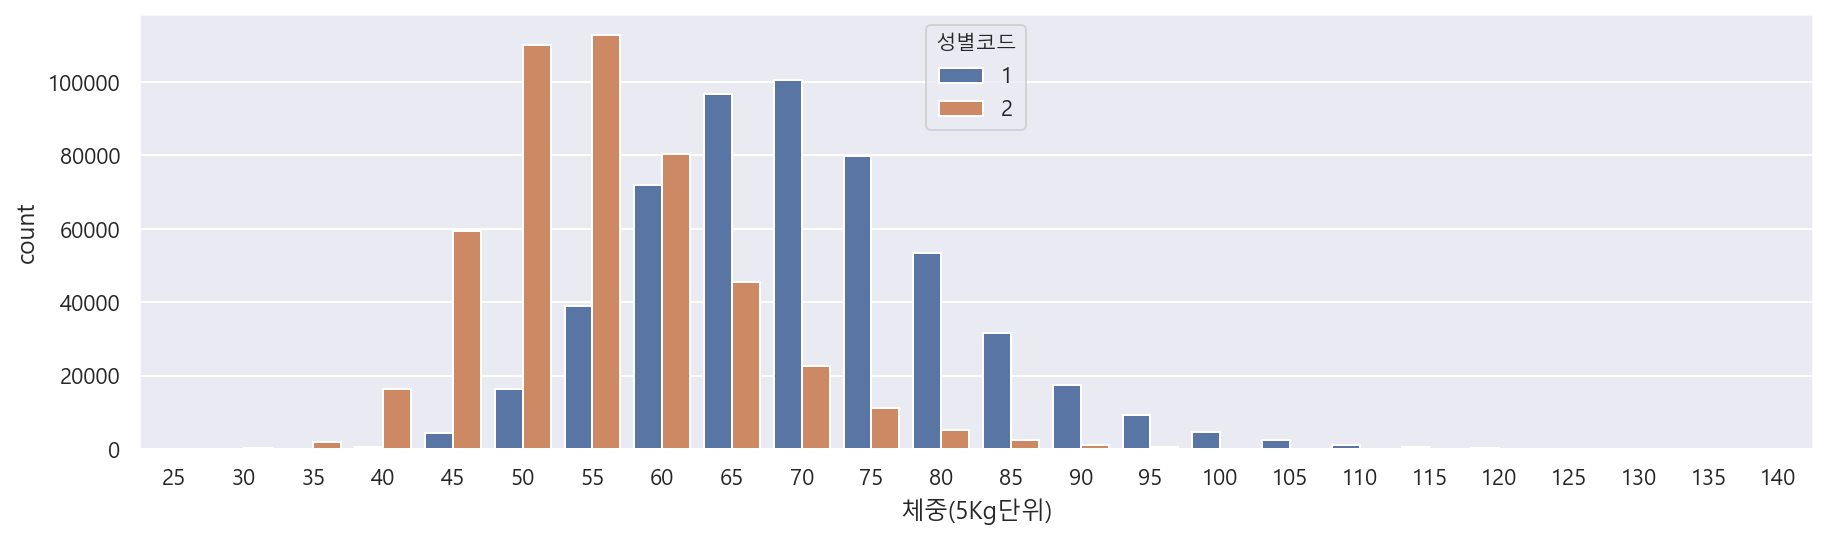

In [38]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="체중(5Kg단위)", hue="성별코드")

#### barplot - 수치형 vs 범주형 데이터 시각화

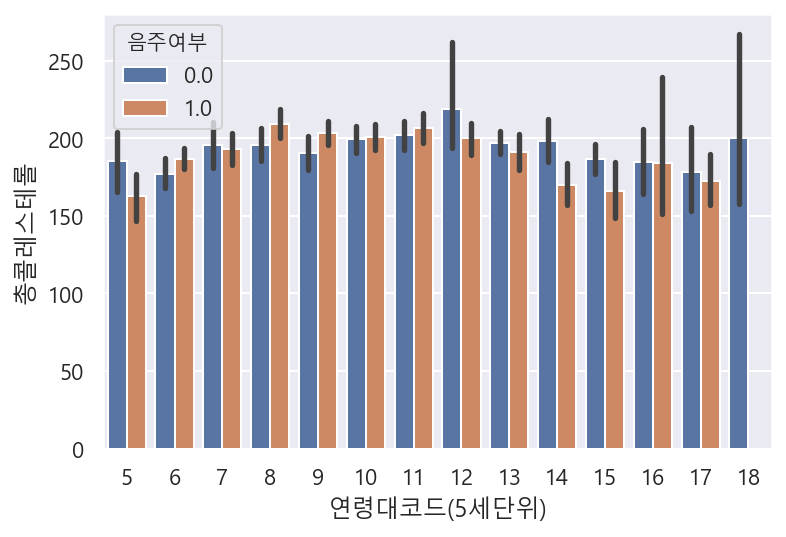

In [39]:
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="음주여부")

In [40]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="흡연상태")

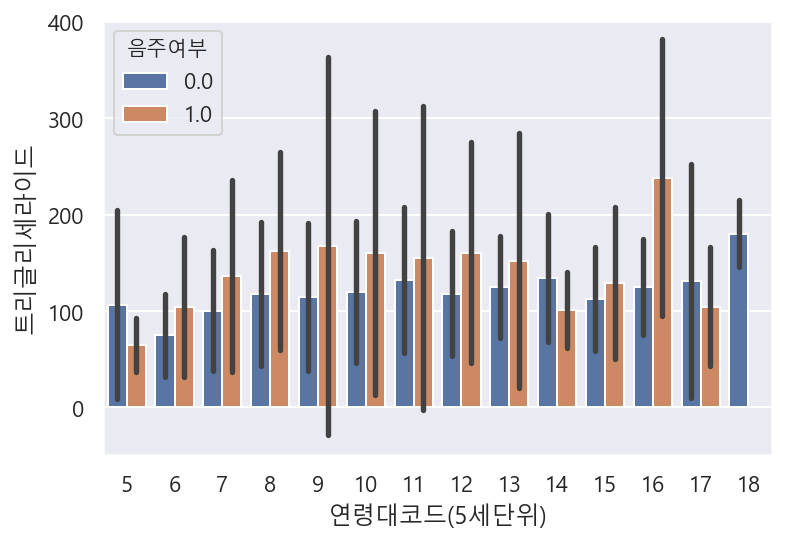

In [41]:
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci="sd")
# ci : 신뢰구간 / "sd" :표준편차 / None : 신뢰구간 없애기

In [42]:
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드", ci=None)

In [43]:
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="음주여부", ci=None)

#### boxplot
- 5가지 요약된 수치를 보여준다
- 최솟값 / 제1사분위수 / 제2사분위수(중앙값) / 제3사분위수 / 최대값

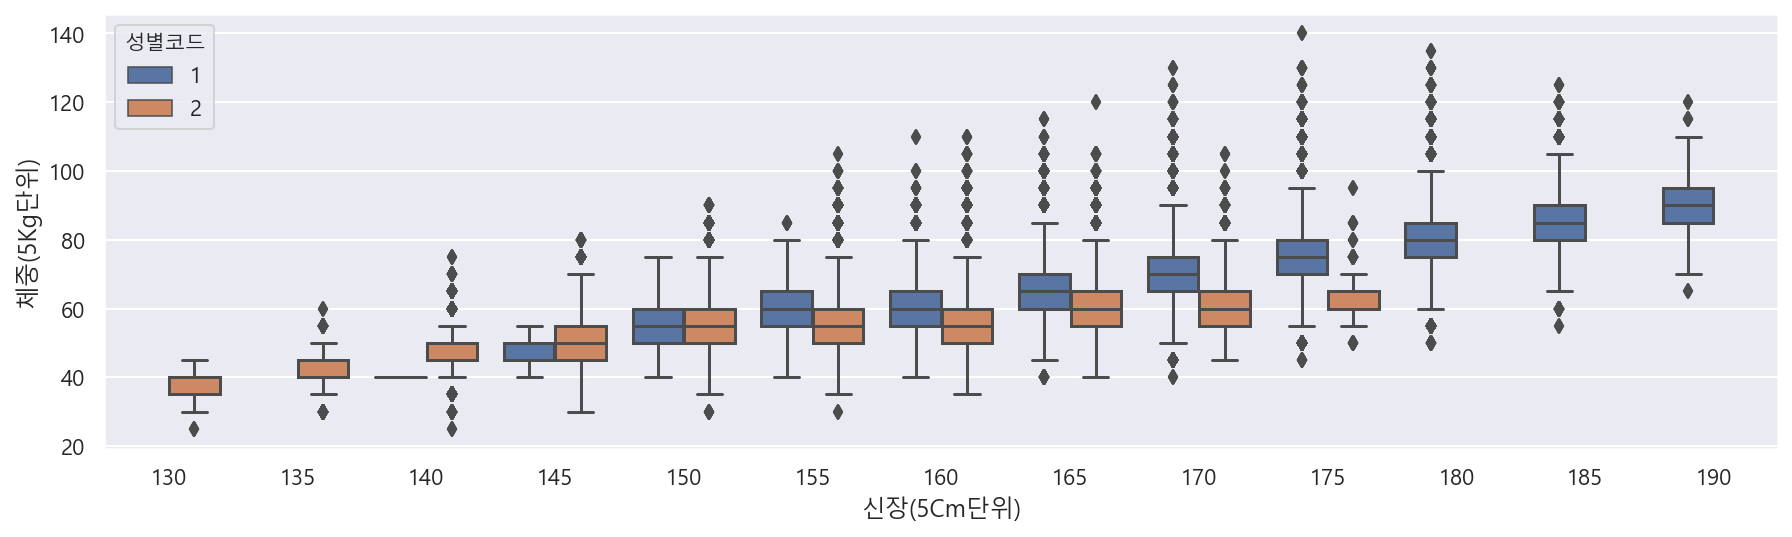

In [44]:
plt.figure(figsize=(15,4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="성별코드")

#### violinplot

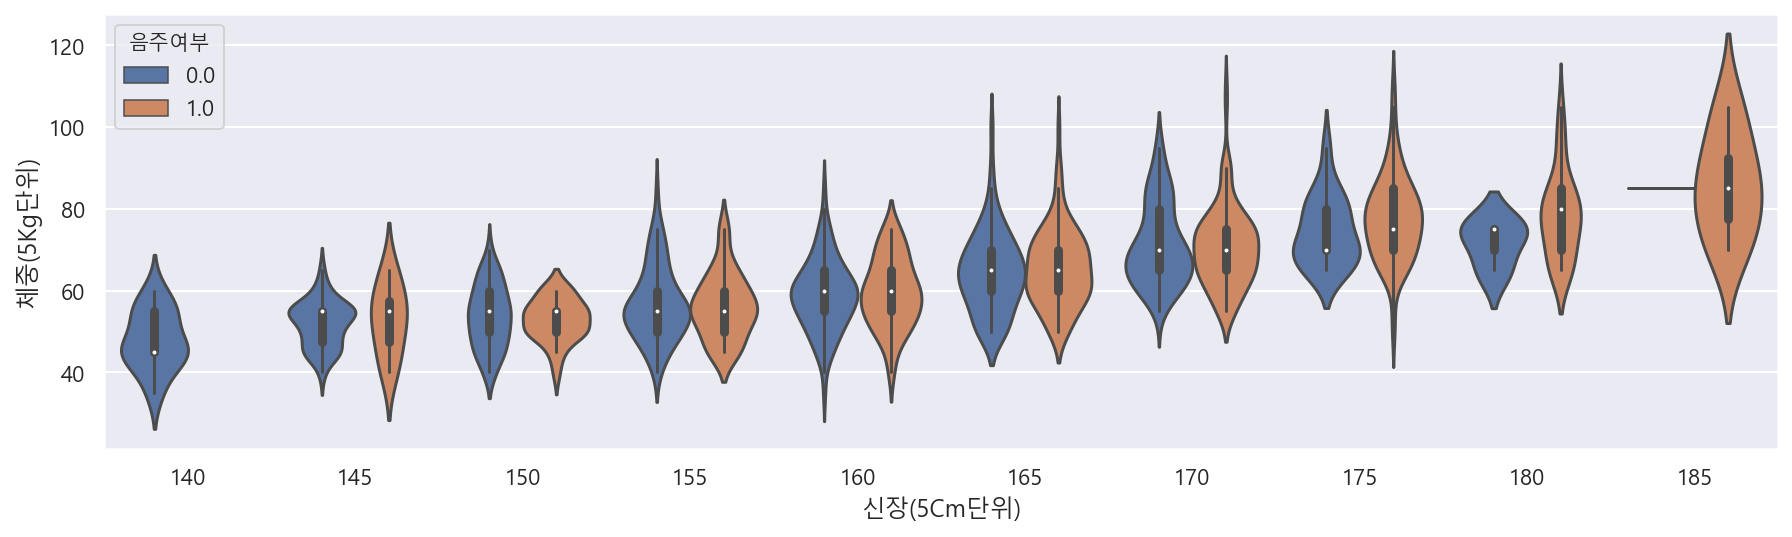

In [45]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample,x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")

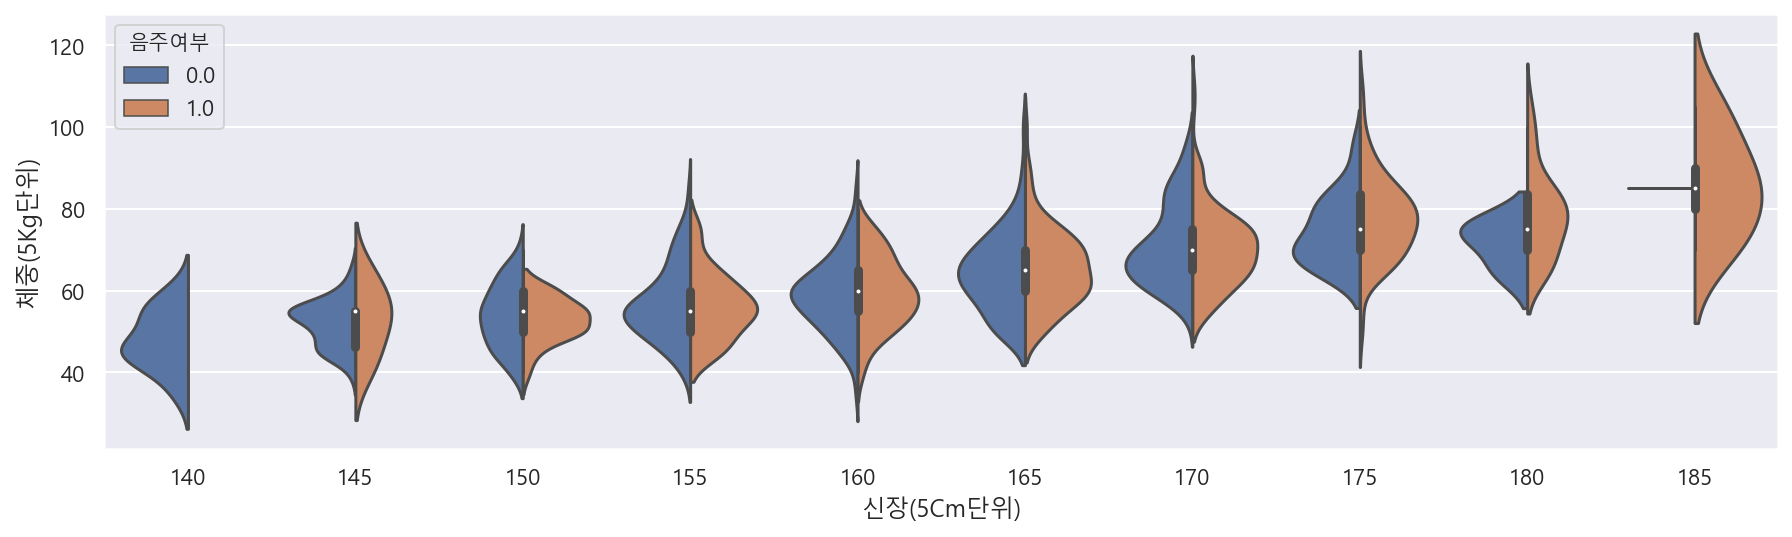

In [46]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample,x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부", split=True)

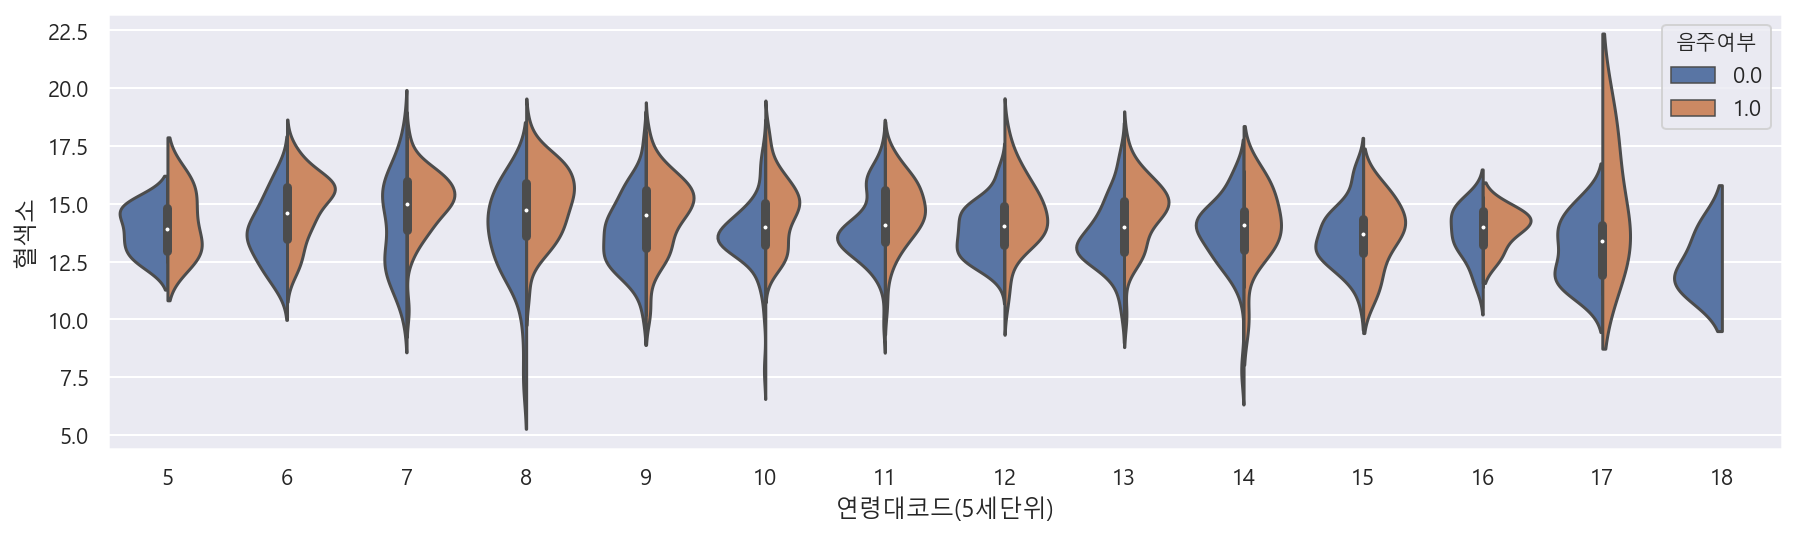

In [47]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample,x="연령대코드(5세단위)", y="혈색소", hue="음주여부", split=True)
# split 두개 데이터 합쳐서 보이게

#### swarm plot
- 범주형 데이터를 산점도로 시각화

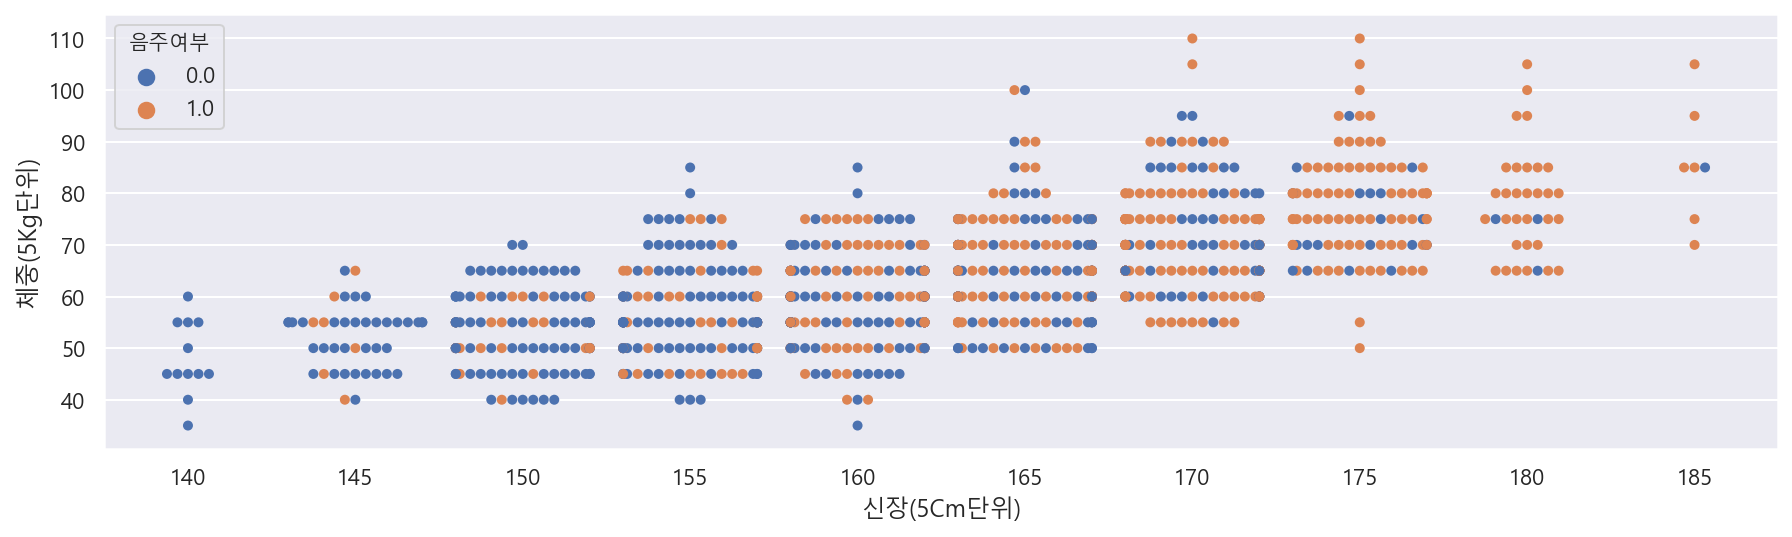

In [48]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample,x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")

C:\Users\ssuki\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\ssuki\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


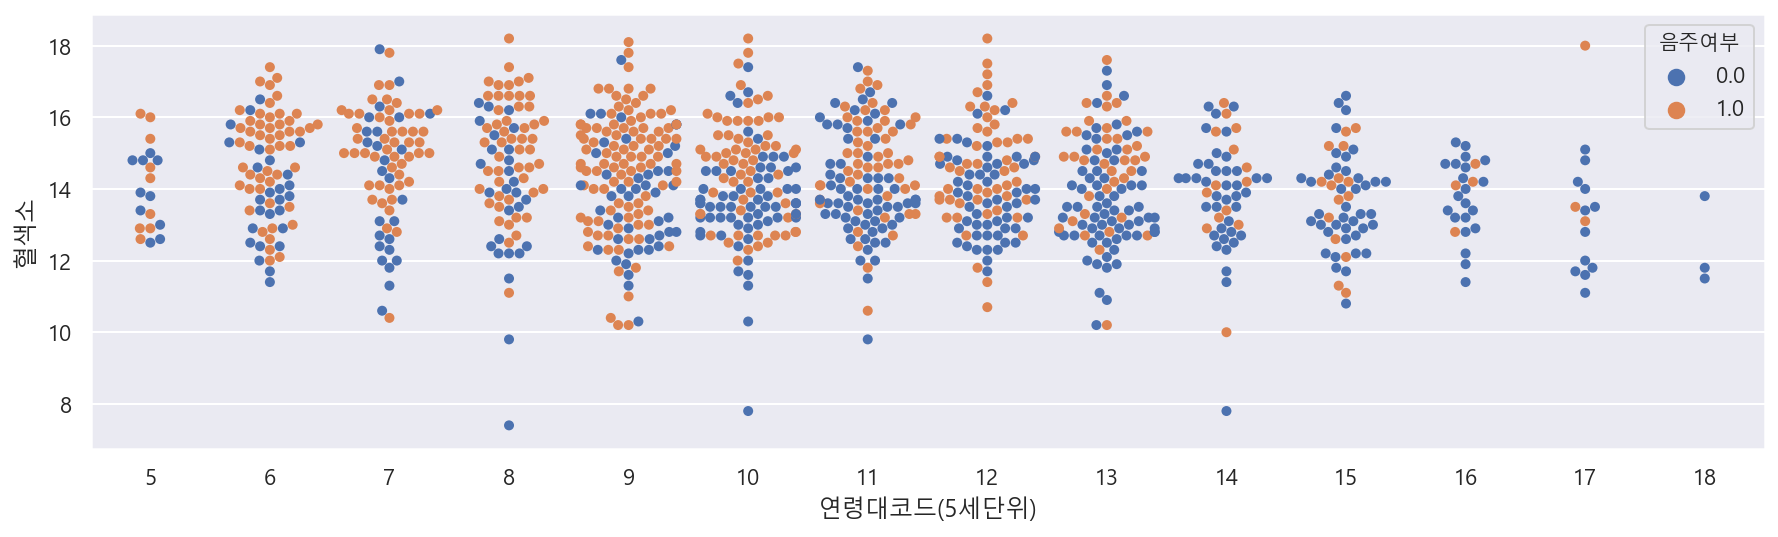

In [49]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample,x="연령대코드(5세단위)", y="혈색소", hue="음주여부")

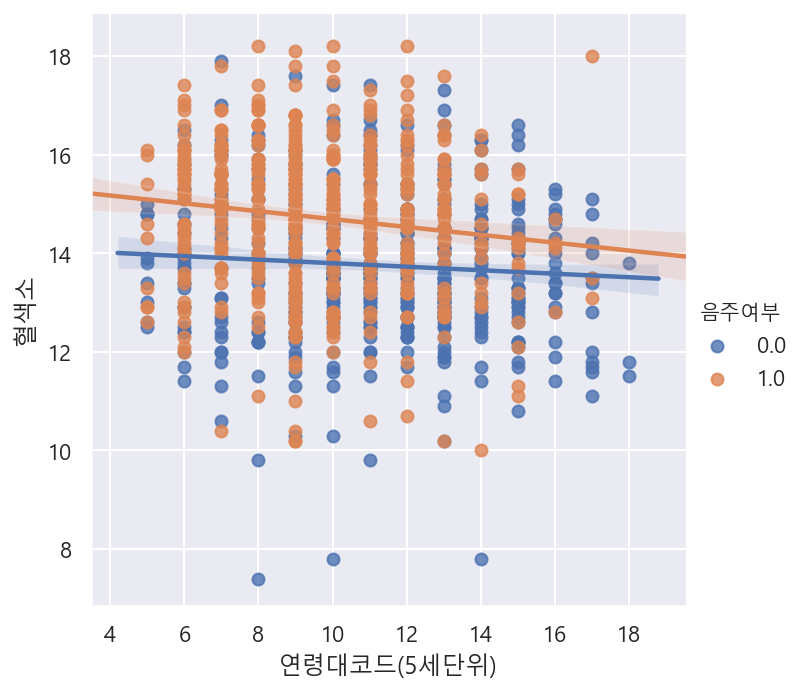

In [50]:
#lmplot 으로 그리기 : 여러개의 값으 표현 / 회귀선(상관관계)
sns.lmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부")

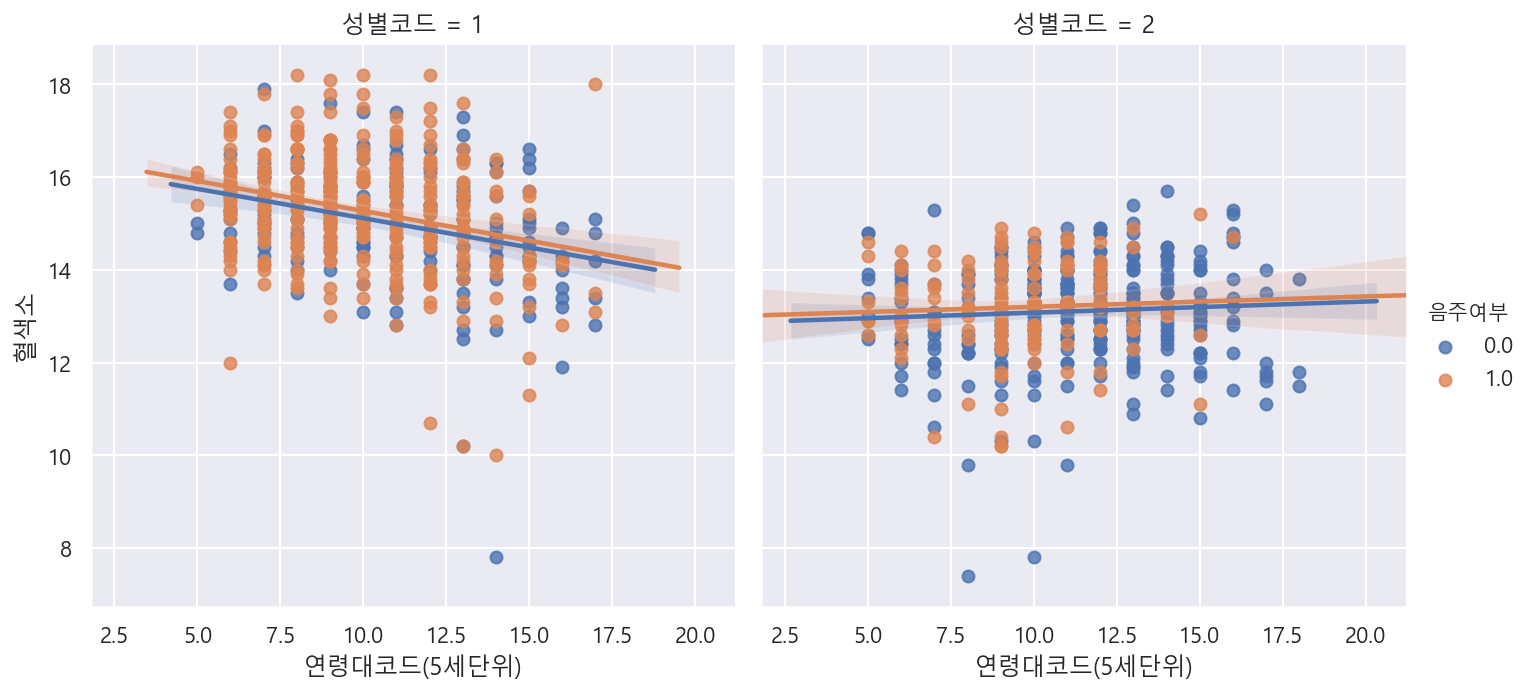

In [51]:
# col은 그래프 분리
sns.lmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", col="성별코드")

### 수치형 데이터 시각화

#### scatterplot - 산점도
- 수치형 vs 수치형 데이터의 상관관계
- 점의 크기를 데이터의 수치에 따라 다르게 볼 수 있다

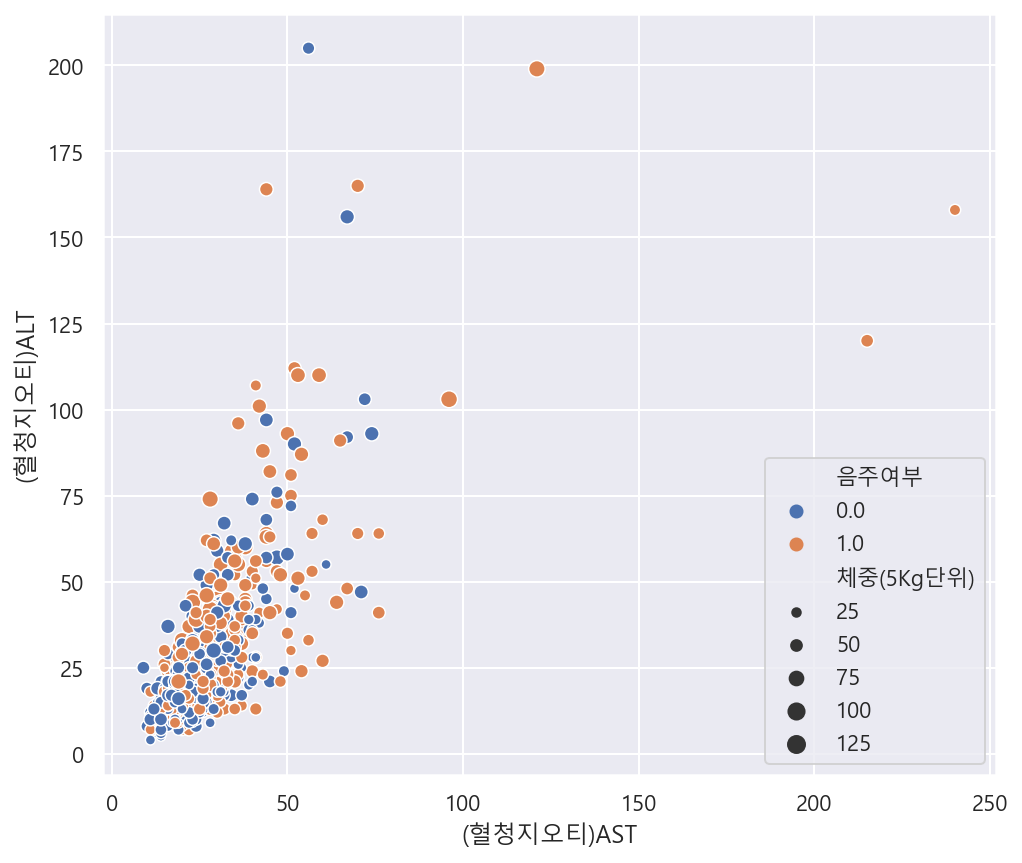

In [52]:
plt.figure(figsize=(8,7))
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", size="체중(5Kg단위)")

<Figure size 576x504 with 0 Axes>

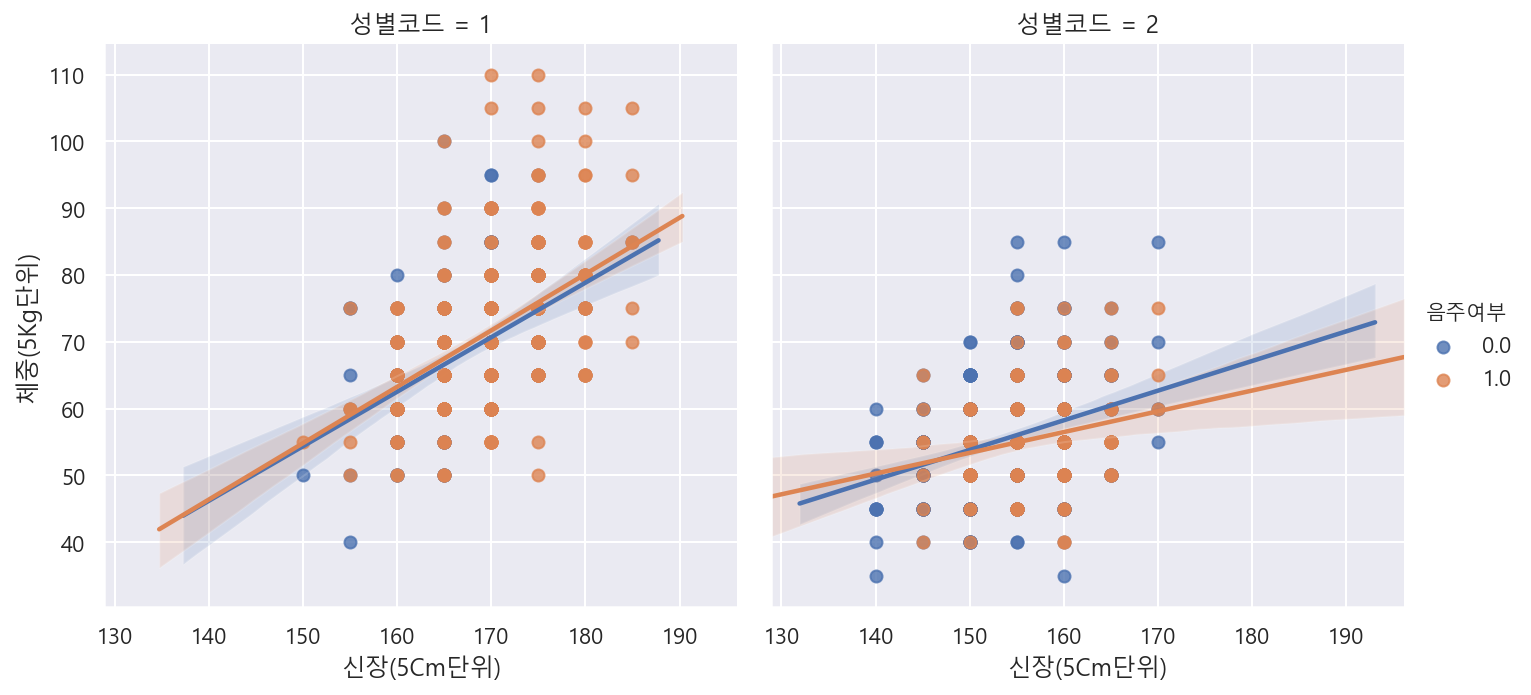

In [53]:
plt.figure(figsize=(8,7))
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부",col="성별코드")

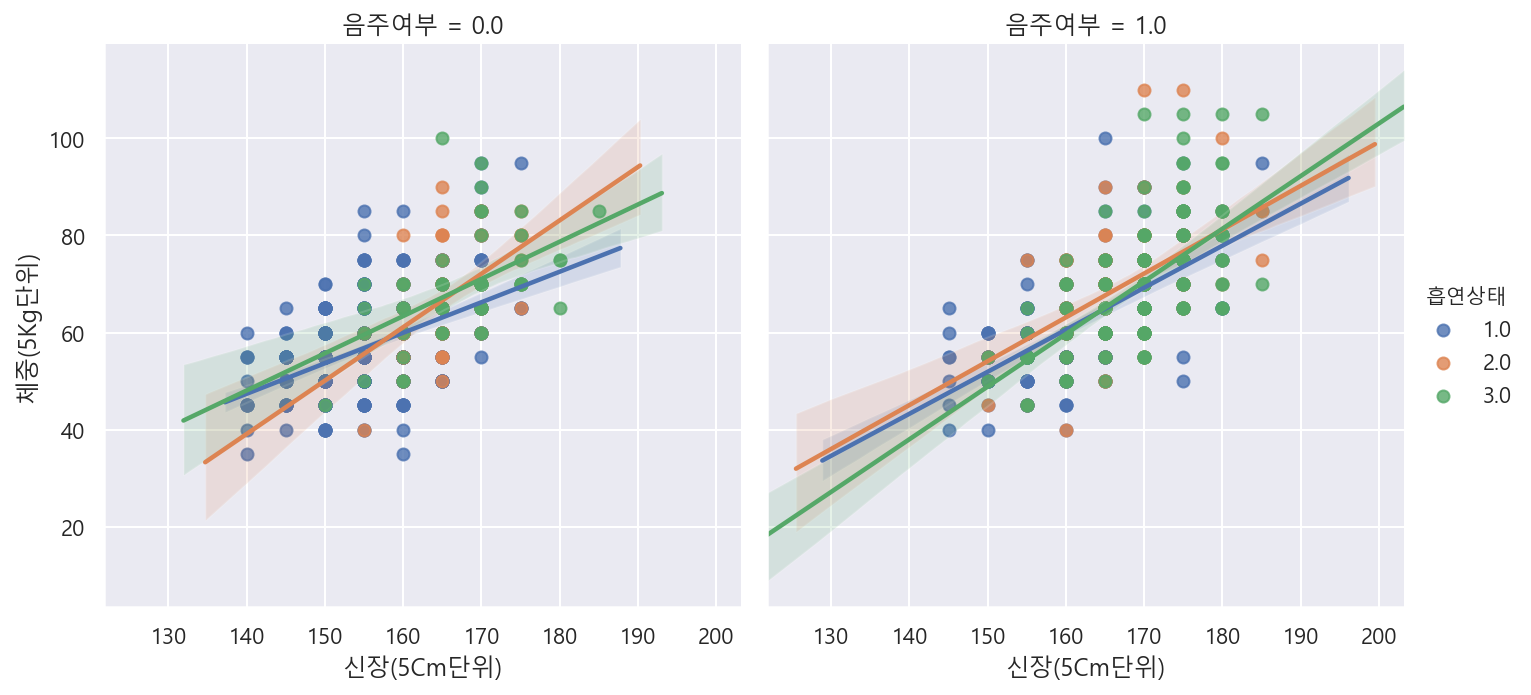

In [54]:
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="흡연상태",col="음주여부")

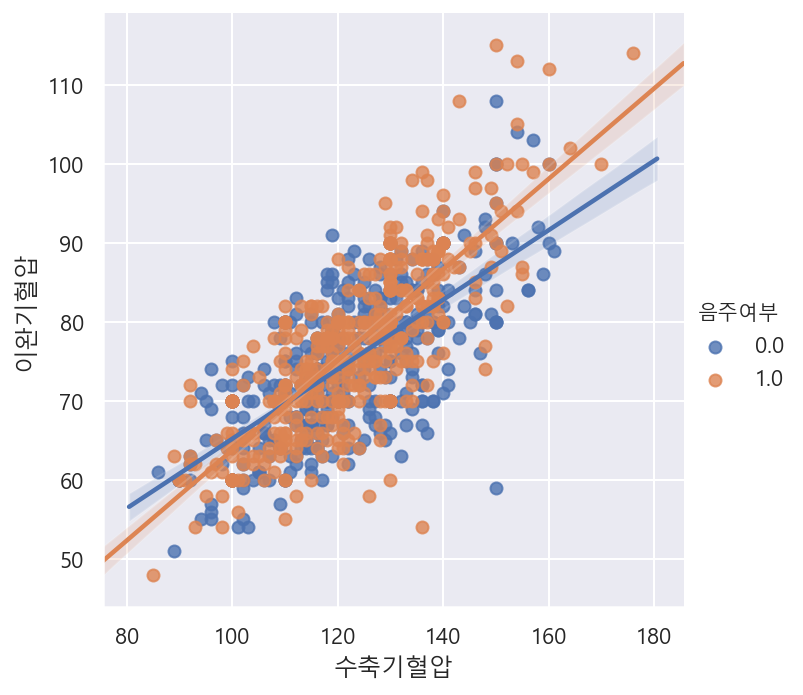

In [55]:
sns.lmplot(data=df_sample, x="수축기혈압", y="이완기혈압", hue="음주여부")

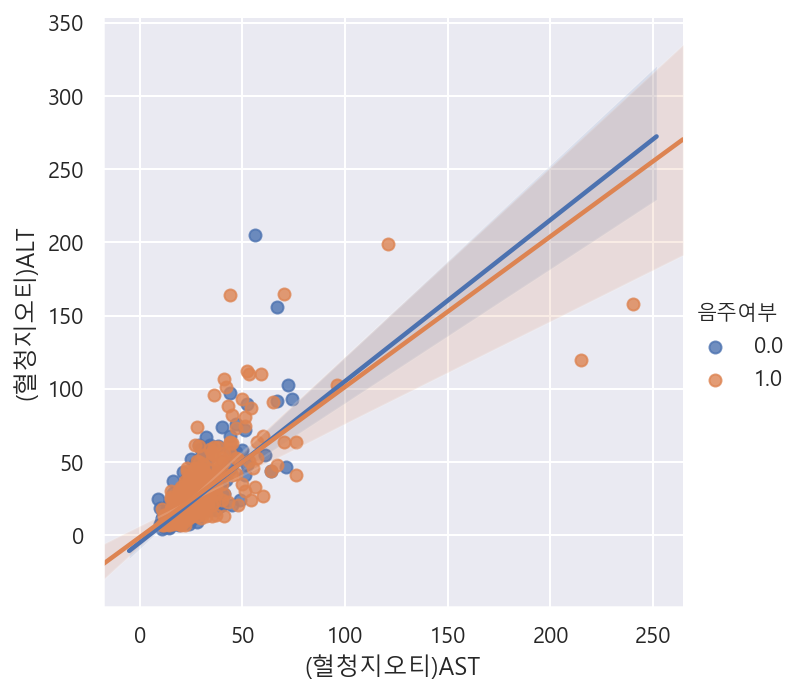

In [56]:
# robust는 이상치 제거
sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", robust=True )

#### 이상치 다루기

In [57]:
df_ASLT = df_sample[(df_sample["(혈청지오티)AST"] < 400) & (df_sample["(혈청지오티)ALT"] < 400)]

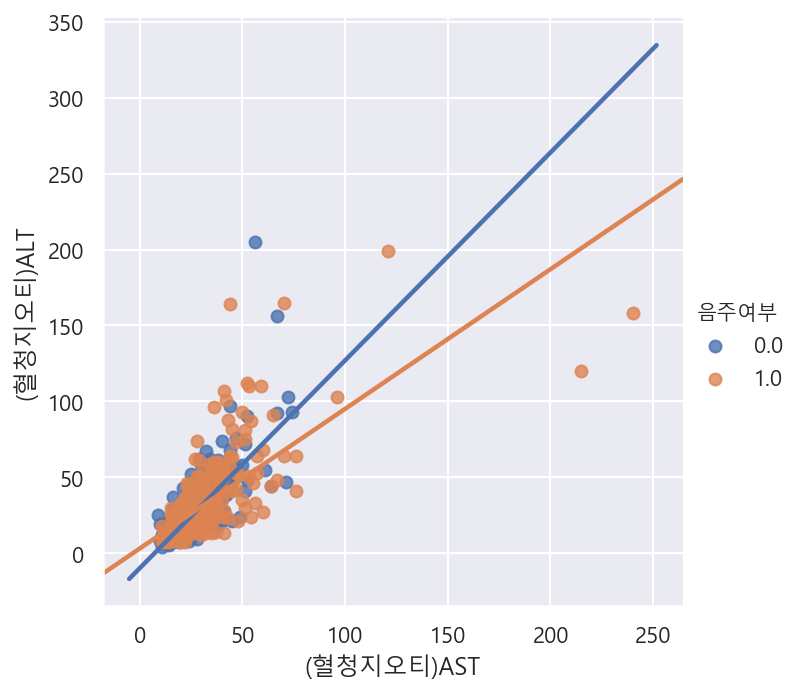

In [58]:
sns.lmplot(data=df_ASLT, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None )

In [59]:
df_ASLT_high = df[(df["(혈청지오티)AST"] > 400) | (df["(혈청지오티)ALT"] > 400)]

In [60]:
df_ASLT_high

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)   허리둘레  \
4754    2017     4755     1            9    41        170         55   74.0   
15820   2017    15821     2           13    45        150         55   83.0   
17830   2017    17831     2            8    41        150         50   64.6   
19949   2017    19950     1            6    41        170        105  103.0   
26464   2017    26465     1            7    41        175         70   82.0   
...      ...      ...   ...          ...   ...        ...        ...    ...   
982305  2017   982306     2           16    28        155         50   79.3   
990867  2017   990868     2           11    41        145         45   75.0   
991226  2017   991227     1            6    42        170         80   81.0   
992747  2017   992748     2           10    41        165         40   58.0   
995323  2017   995324     1            7    11        185        105  101.4   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
4754      1.0    0.7  ...  125.0   3.0   1.0         0      NaN    NaN   
15820     0.6    1.2  ...  999.0   1.0   1.0         0      NaN    NaN   
17830     1.2    1.2  ...  111.0   3.0   1.0         1      NaN    NaN   
19949     1.0    1.2  ...  133.0   1.0   0.0         0      NaN    NaN   
26464     1.2    1.2  ...  169.0   1.0   0.0         1      NaN    NaN   
...       ...    ...  ...    ...   ...   ...       ...      ...    ...   
982305    0.4    0.7  ...   71.0   1.0   0.0         0      NaN    NaN   
990867    0.9    1.2  ...  279.0   1.0   0.0         0      NaN    NaN   
991226    0.7    0.8  ...   49.0   3.0   1.0         0      NaN    NaN   
992747    0.9    0.7  ...  777.0   3.0   1.0         0      NaN    NaN   
995323    0.7    0.7  ...  174.0   3.0   1.0         0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
4754        NaN           NaN  NaN  20181126  
15820       NaN           NaN  NaN  20181126  
17830       NaN           NaN  1.0  20181126  
19949       NaN           NaN  NaN  20181126  
26464       NaN           NaN  1.0  20181126  
...         ...           ...  ...       ...  
982305      NaN           NaN  NaN  20181126  
990867      NaN           NaN  NaN  20181126  
991226      NaN           NaN  NaN  20181126  
992747      NaN           NaN  NaN  20181126  
995323      NaN           NaN  NaN  20181126  

[381 rows x 34 columns]

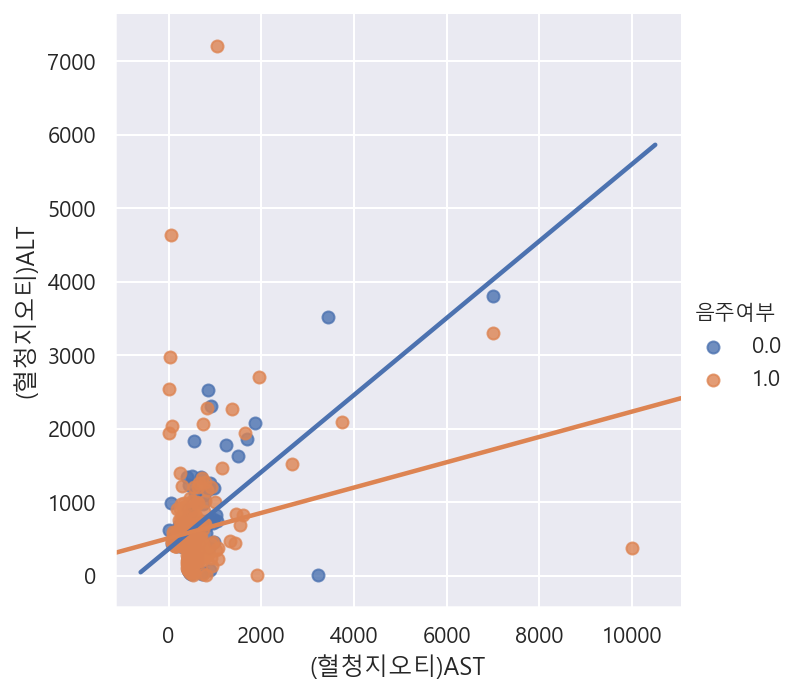

In [61]:
sns.lmplot(data=df_ASLT_high, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None )

In [62]:
df_ASLT_high_8000 = df_ASLT_high[df_ASLT_high["(혈청지오티)AST"] >8000]
df_ASLT_high_8000

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
541757  2017   541758     1           11    41        170         45  66.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
541757    0.9    0.7  ...  419.0   3.0   1.0         0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상  치석   데이터공개일자  
541757      NaN           NaN NaN  20181126  

[1 rows x 34 columns]

#### displot

In [64]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [71]:
df_chol = df[df["총콜레스테롤"].notnull()]

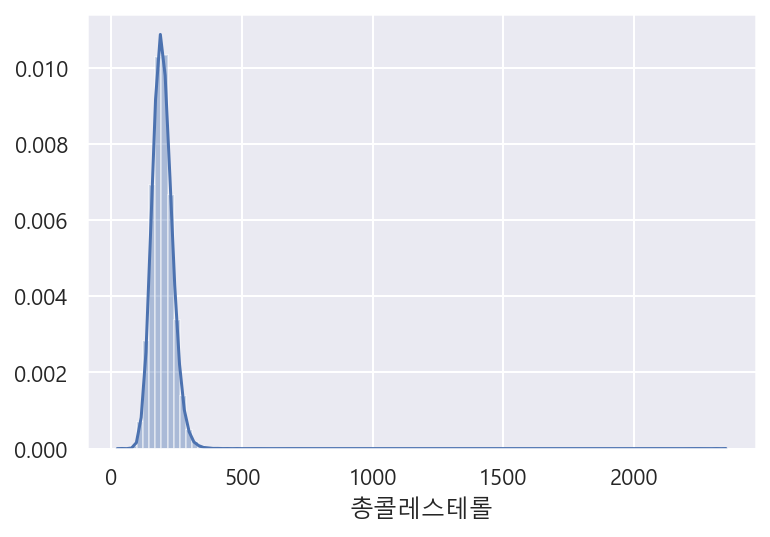

In [74]:
# distplot는 결측치가 있으면 X
sns.distplot(df_chol["총콜레스테롤"], bins=100)

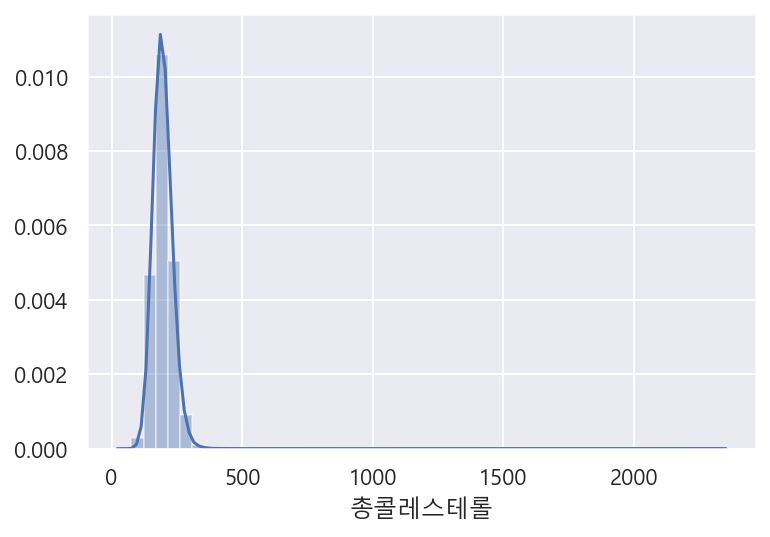

In [81]:
# '&' 조건 쓸 때는 "()" 표시해서 우선순위 나타내줘야함
sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 1), 
            "총콜레스테롤"])

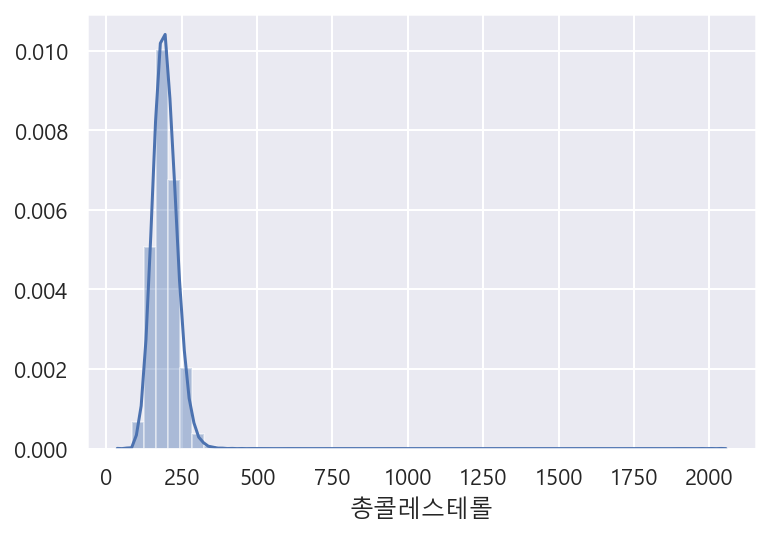

In [82]:
sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 0), 
            "총콜레스테롤"])

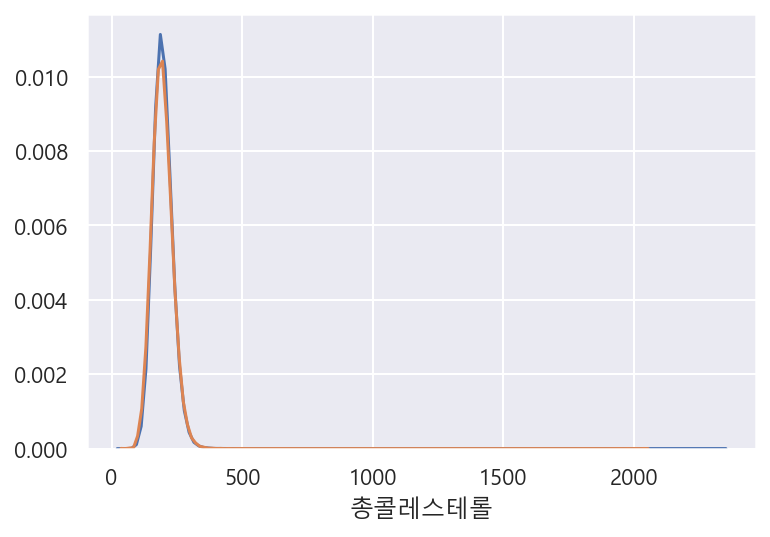

In [86]:
sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 1), 
            "총콜레스테롤"], hist=False)
sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 0), 
            "총콜레스테롤"], hist=False)

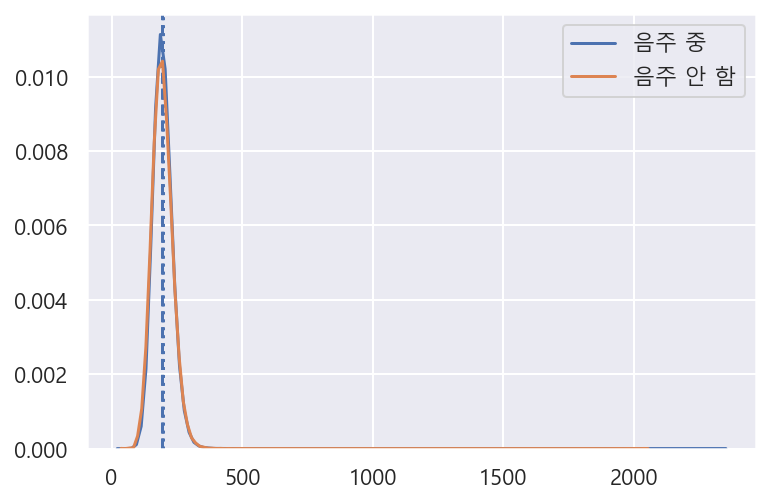

In [93]:
plt.axvline(df["총콜레스테롤"].mean(), linestyle=":")
plt.axvline(df["총콜레스테롤"].median(), linestyle="--")
sns.kdeplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 1), 
            "총콜레스테롤"], label= "음주 중")
sns.kdeplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 0), 
            "총콜레스테롤"], label= "음주 안 함")

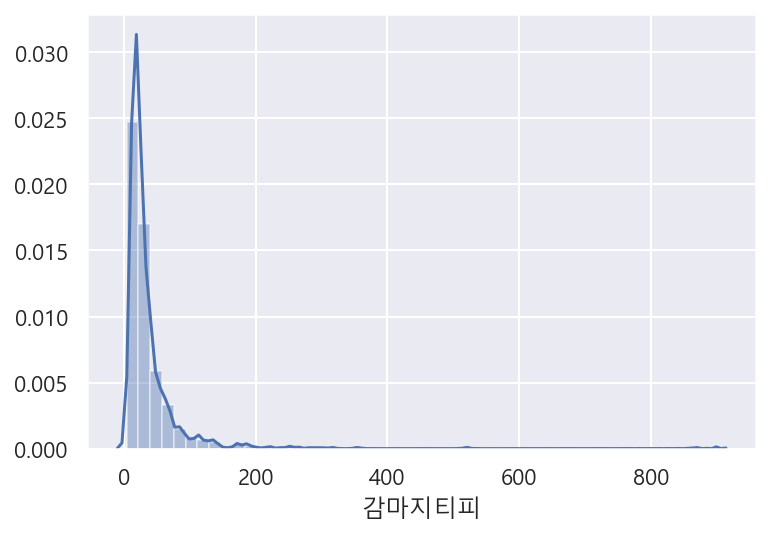

In [100]:
sns.distplot(df_sample.loc[df_sample["감마지티피"].notnull(), "감마지티피"])

In [103]:
df_ma = df[df["감마지티피"].notnull()]

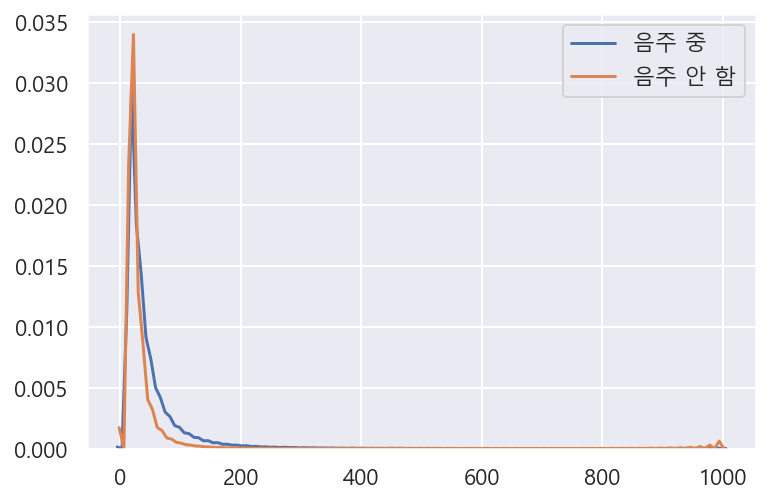

In [109]:
s_1 = df_ma.loc[df_ma["음주여부"] == 1, "감마지티피"]
s_0 = df_ma.loc[df_ma["음주여부"] == 0, "감마지티피"]

sns.kdeplot(s_1, label="음주 중")
sns.kdeplot(s_0, label="음주 안 함")

### 상관분석
- r이 -1.0 ~ -0.7 사이면, 강한 음적 선형관계
- r이 -0.7 ~ -0.3 사이면, 뚜렷한 음적 선형관계
- r이 -0.3 ~ -0.1 사이면, 약한 음적 선형관계
- r이 -0.1 ~ +0.1 사이면, 거의 무시될 수 있는 선형관계
- r이 +0.1 ~ +0.3 사이면, 약한 양적 선형관계
- r이 +0.3 ~ +0.7 사이면, 뚜렷한 양적 선형관계
- r이 +0.7 ~ +1.0 사이면, 강한 양적 선형관계

In [112]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [114]:
columns = ['연령대코드(5세단위)', '체중(5Kg단위)','신장(5Cm단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부']
columns

['연령대코드(5세단위)',
 '체중(5Kg단위)',
 '신장(5Cm단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부']

#### 상관계수 구하기

In [118]:
df_small = df_sample[columns]
df_corr = df_small.corr()
df_corr

연령대코드(5세단위)  체중(5Kg단위)  신장(5Cm단위)      허리둘레     시력(좌)     시력(우)  \
연령대코드(5세단위)     1.000000  -0.200336  -0.380239  0.159797 -0.217613 -0.308829   
체중(5Kg단위)      -0.200336   1.000000   0.665067  0.785950  0.122194  0.168929   
신장(5Cm단위)      -0.380239   0.665067   1.000000  0.312230  0.202426  0.236260   
허리둘레            0.159797   0.785950   0.312230  1.000000  0.017355  0.030809   
시력(좌)          -0.217613   0.122194   0.202426  0.017355  1.000000  0.346265   
시력(우)          -0.308829   0.168929   0.236260  0.030809  0.346265  1.000000   
청력(좌)           0.233960  -0.043727  -0.064044  0.050644 -0.039499 -0.072118   
청력(우)           0.264549  -0.047717  -0.074738  0.073086 -0.081000 -0.102880   
수축기혈압           0.222408   0.288983   0.063929  0.349219 -0.012888 -0.036395   
이완기혈압           0.091006   0.324783   0.157810  0.329256  0.027854  0.001282   
식전혈당(공복혈당)      0.215097   0.164926   0.005997  0.235417 -0.041152 -0.043653   
총콜레스테롤         -0.008847   0.050713  -0.004133  0.036389 -0.052320  0.016831   
트리글리세라이드        0.037474   0.260689   0.135087  0.267643  0.032493  0.070753   
HDL콜레스테롤       -0.095972  -0.330577  -0.207537 -0.311478 -0.045579 -0.068572   
LDL콜레스테롤        0.008560   0.043839   0.008146  0.017287 -0.052768  0.003336   
혈색소            -0.178977   0.540191   0.541155  0.377673  0.142582  0.190303   
요단백             0.058702   0.012154  -0.007699  0.045948 -0.024741 -0.024977   
혈청크레아티닌         0.044958   0.170468   0.212811  0.131421  0.022175  0.080797   
(혈청지오티)AST      0.129357   0.193976   0.055783  0.253549  0.011212  0.003236   
(혈청지오티)ALT     -0.009871   0.401756   0.159199  0.407063  0.080793  0.123455   
감마지티피          -0.015357   0.246924   0.185091  0.234831  0.111903  0.035304   
흡연상태           -0.121132   0.392874   0.512294  0.246296  0.141441  0.089486   
음주여부           -0.275285   0.290207   0.410946  0.134891  0.081130  0.158678   

                청력(좌)     청력(우)     수축기혈압     이완기혈압  ...  HDL콜레스테롤  LDL콜레스테롤  \
연령대코드(5세단위)  0.233960  0.264549  0.222408  0.091006  ... -0.095972  0.008560   
체중(5Kg단위)   -0.043727 -0.047717  0.288983  0.324783  ... -0.330577  0.043839   
신장(5Cm단위)   -0.064044 -0.074738  0.063929  0.157810  ... -0.207537  0.008146   
허리둘레         0.050644  0.073086  0.349219  0.329256  ... -0.311478  0.017287   
시력(좌)       -0.039499 -0.081000 -0.012888  0.027854  ... -0.045579 -0.052768   
시력(우)       -0.072118 -0.102880 -0.036395  0.001282  ... -0.068572  0.003336   
청력(좌)        1.000000  0.565295  0.039115 -0.015526  ... -0.047898  0.006018   
청력(우)        0.565295  1.000000  0.056661 -0.005658  ... -0.069527 -0.032362   
수축기혈압        0.039115  0.056661  1.000000  0.751731  ... -0.093036 -0.007070   
이완기혈압       -0.015526 -0.005658  0.751731  1.000000  ... -0.091701  0.038887   
식전혈당(공복혈당)   0.012104  0.069277  0.218697  0.160601  ... -0.132477  0.043905   
총콜레스테롤       0.008247 -0.047907  0.039290  0.084102  ...  0.025190  0.861641   
트리글리세라이드     0.018695  0.034650  0.233447  0.225436  ... -0.312560  0.064503   
HDL콜레스테롤    -0.047898 -0.069527 -0.093036 -0.091701  ...  1.000000 -0.162307   
LDL콜레스테롤     0.006018 -0.032362 -0.007070  0.038887  ... -0.162307  1.000000   
혈색소         -0.000433 -0.050208  0.169241  0.255690  ... -0.252492  0.068631   
요단백          0.041231  0.081749  0.043110  0.035826  ... -0.058606  0.092367   
혈청크레아티닌      0.016792  0.017758  0.034018  0.081965  ... -0.141626 -0.013668   
(혈청지오티)AST   0.020671 -0.004681  0.133472  0.131482  ... -0.060252 -0.011918   
(혈청지오티)ALT   0.044048 -0.019893  0.163762  0.191155  ... -0.169802  0.022981   
감마지티피       -0.025004 -0.024936  0.191333  0.200150  ... -0.067822  0.007599   
흡연상태         0.007413 -0.042159  0.094145  0.144974  ... -0.213555  0.025842   
음주여부        -0.053293 -0.072404  0.042372  0.108679  ... -0.016938 -0.023031   

                  혈색소       요단백   혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT     감마지티피  \
연령대코드(5세단위) -0.178977  0.058702  0.044958    0.129357   -0.009871 -0.015357   
체중(5Kg단위)    

In [120]:
df_corr["신장(5Cm단위)"].sort_values()

연령대코드(5세단위)   -0.380239
HDL콜레스테롤      -0.207537
청력(우)         -0.074738
청력(좌)         -0.064044
요단백           -0.007699
총콜레스테롤        -0.004133
식전혈당(공복혈당)     0.005997
LDL콜레스테롤       0.008146
(혈청지오티)AST     0.055783
수축기혈압          0.063929
트리글리세라이드       0.135087
이완기혈압          0.157810
(혈청지오티)ALT     0.159199
감마지티피          0.185091
시력(좌)          0.202426
혈청크레아티닌        0.212811
시력(우)          0.236260
허리둘레           0.312230
음주여부           0.410946
흡연상태           0.512294
혈색소            0.541155
체중(5Kg단위)      0.665067
신장(5Cm단위)      1.000000
Name: 신장(5Cm단위), dtype: float64

In [123]:
# loc[행,열]
df_corr.loc[df_corr["신장(5Cm단위)"] > 0.3, "신장(5Cm단위)"]

체중(5Kg단위)    0.665067
신장(5Cm단위)    1.000000
허리둘레         0.312230
혈색소          0.541155
흡연상태         0.512294
음주여부         0.410946
Name: 신장(5Cm단위), dtype: float64

In [124]:
df_corr.loc[df_corr["음주여부"] > 0.3, "음주여부"]

신장(5Cm단위)    0.410946
혈색소          0.312005
흡연상태         0.344286
음주여부         1.000000
Name: 음주여부, dtype: float64

In [130]:
df_corr["혈색소"].sort_values(ascending=False).head(7)

혈색소           1.000000
신장(5Cm단위)     0.541155
체중(5Kg단위)     0.540191
흡연상태          0.434467
허리둘레          0.377673
(혈청지오티)ALT    0.331891
음주여부          0.312005
Name: 혈색소, dtype: float64

In [131]:
df_corr["감마지티피"].sort_values(ascending=False).head(7)

감마지티피         1.000000
(혈청지오티)AST    0.531529
(혈청지오티)ALT    0.424481
트리글리세라이드      0.271554
체중(5Kg단위)     0.246924
혈색소           0.245109
허리둘레          0.234831
Name: 감마지티피, dtype: float64

#### heatmap

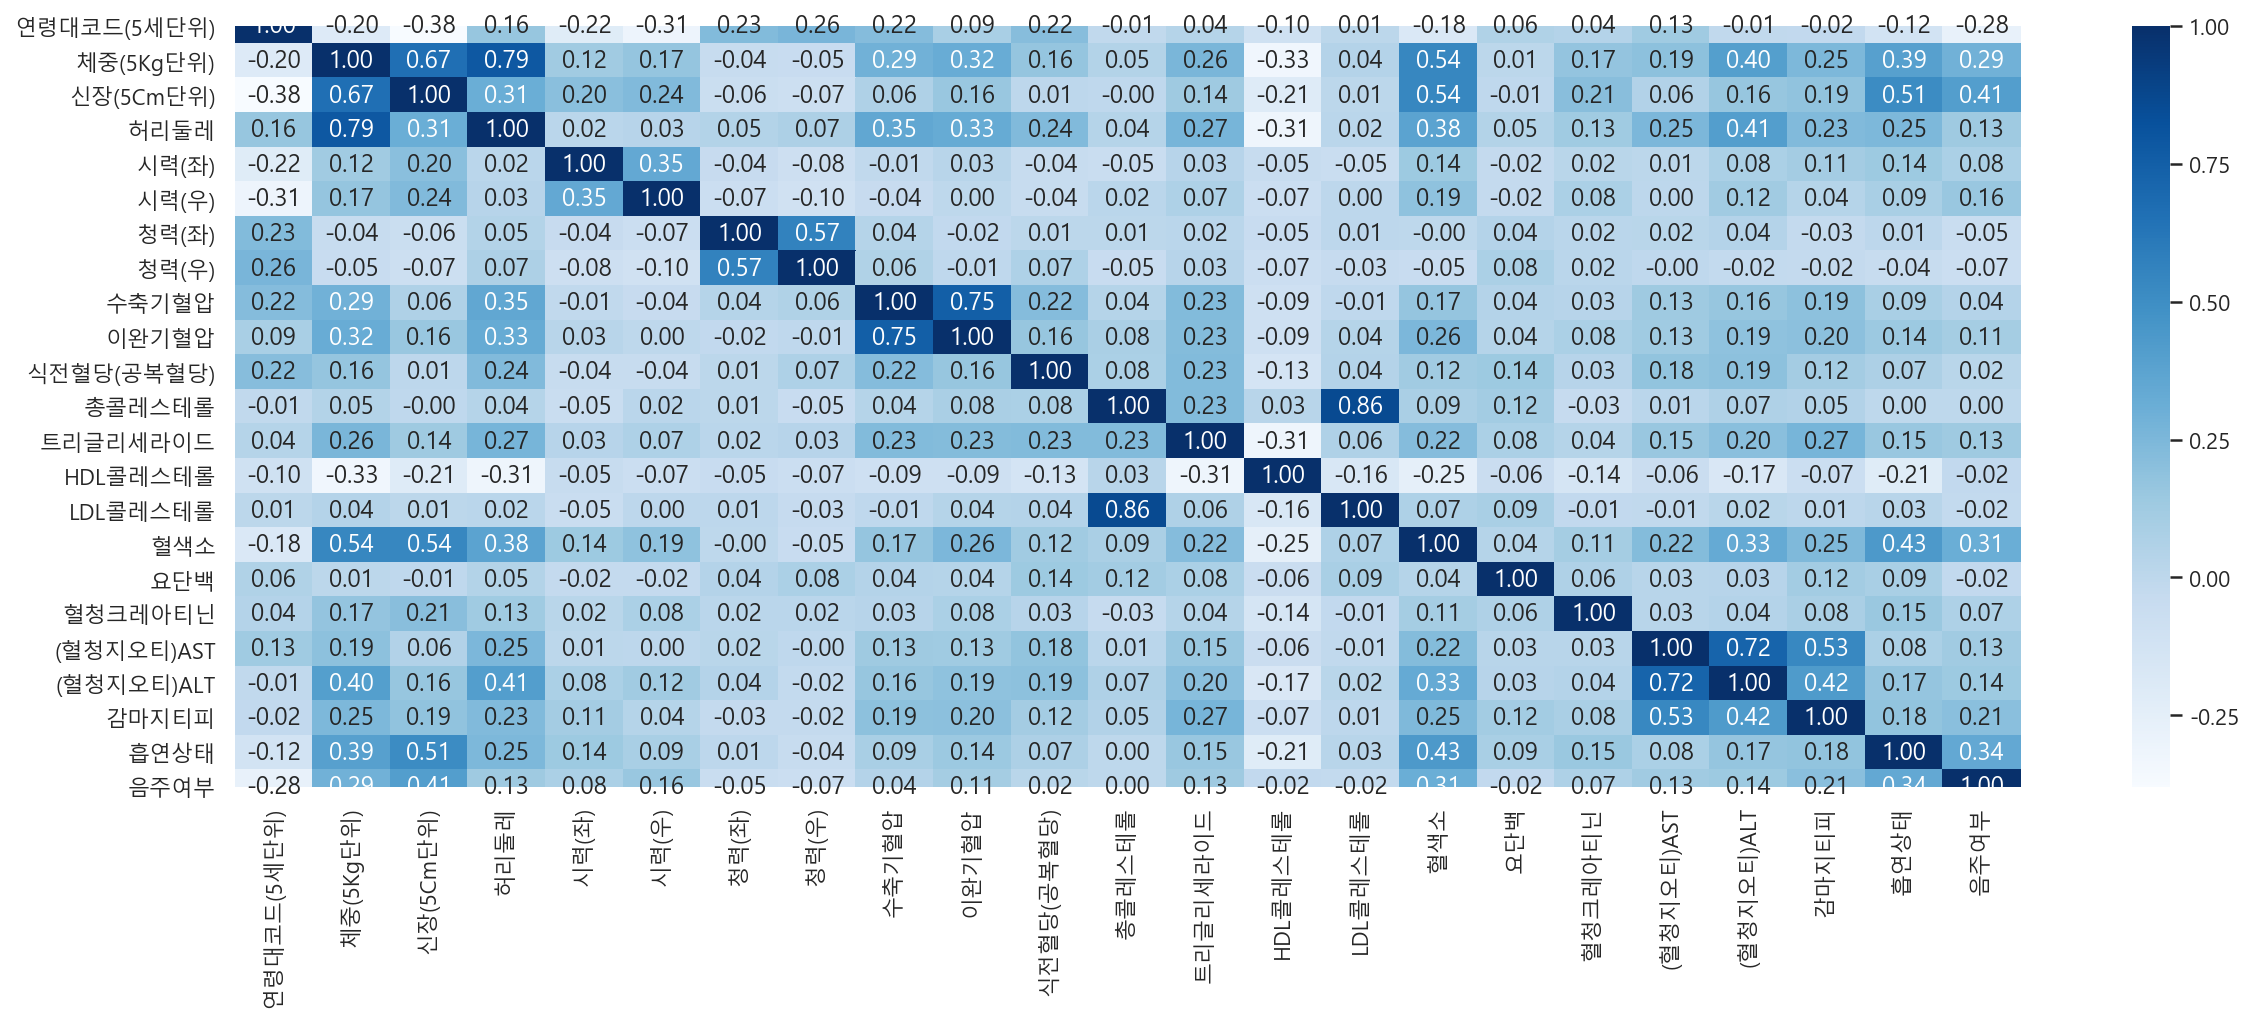

In [137]:
plt.figure(figsize=(20,7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues")

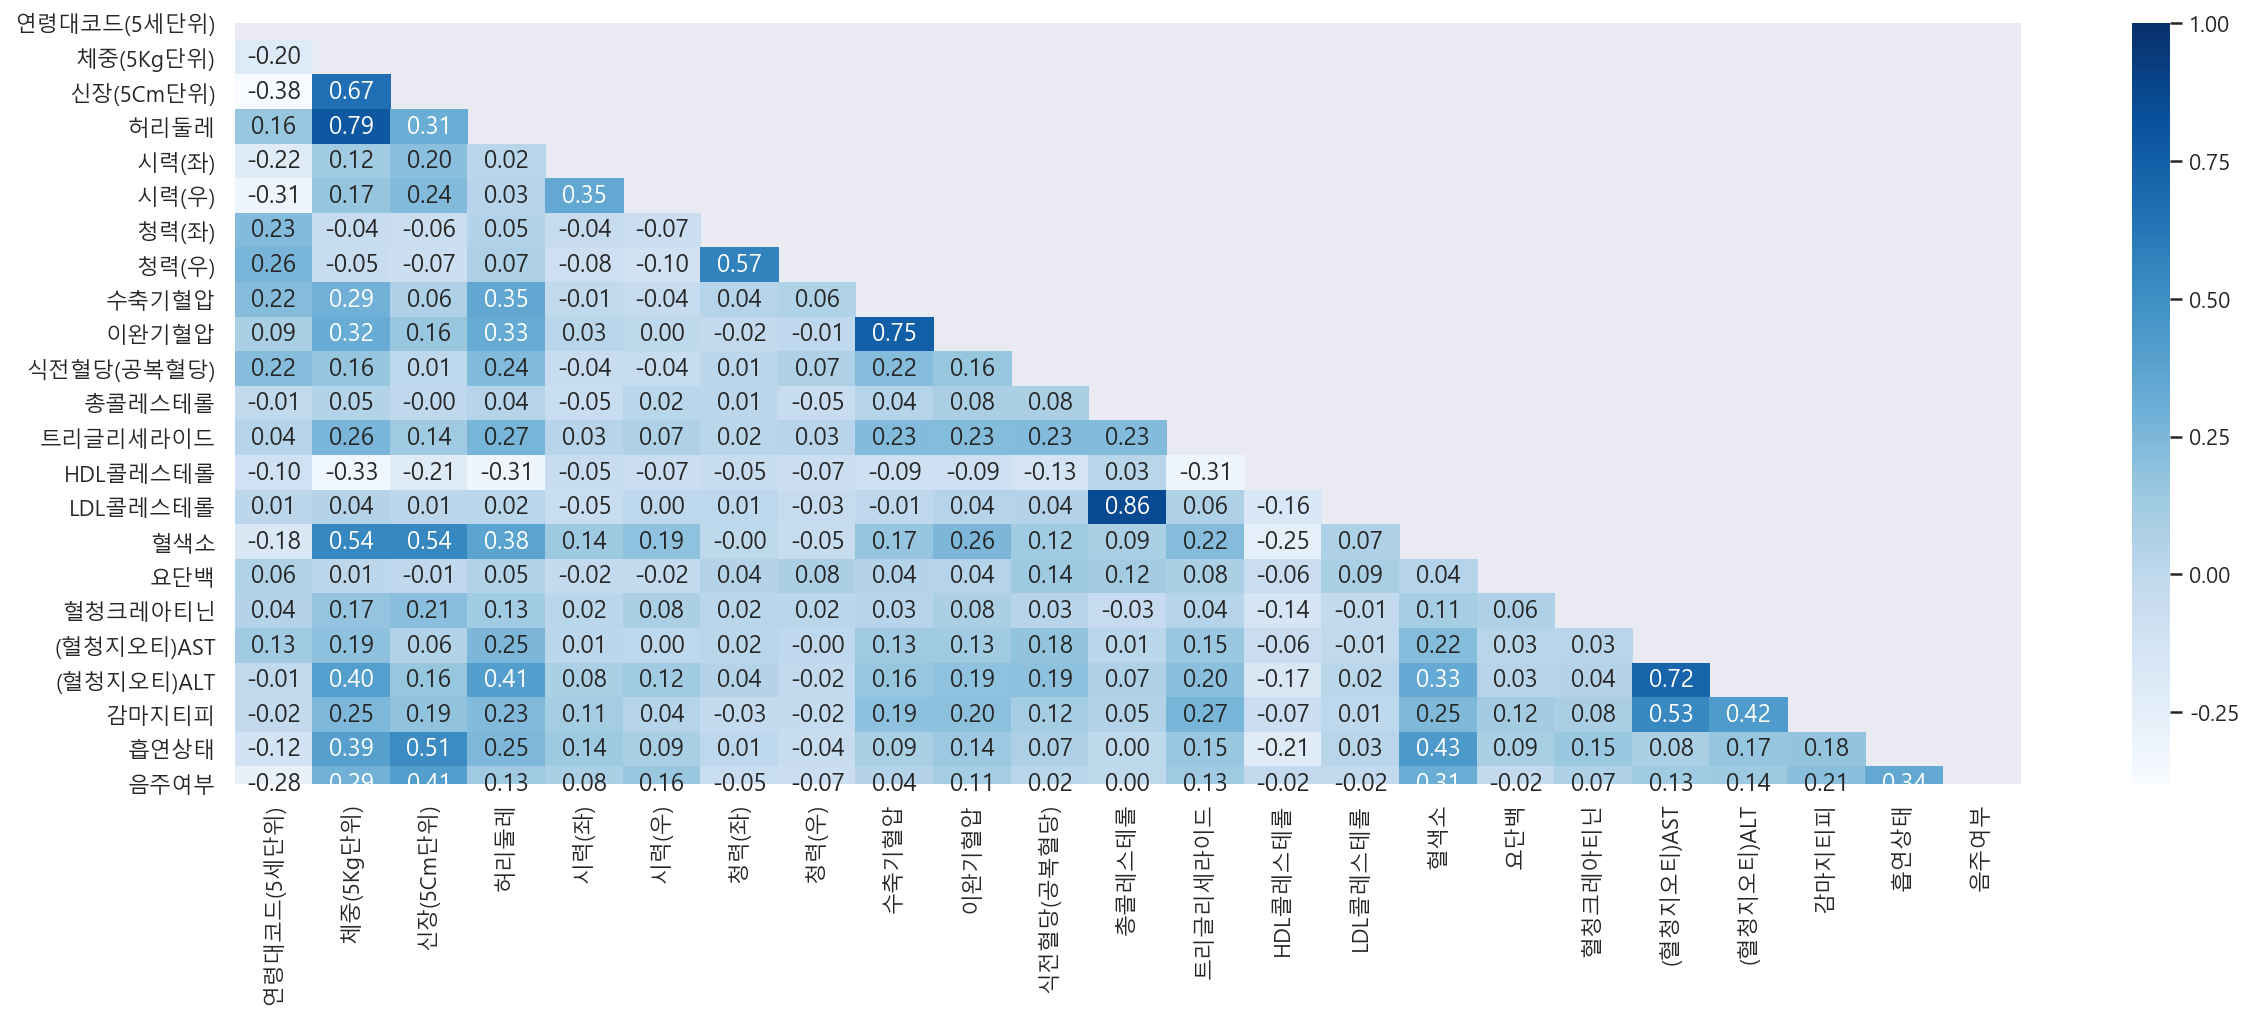

In [140]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
mask

plt.figure(figsize=(20,7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)